In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Annotation: cCREs

In [3]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"
fpath = file.path(fdiry, fname)

dat_freq_ccre = read_tsv(fpath, show_col_types = FALSE)
head(dat_freq_ccre)

Peak,Chrom,Start,End,Len,Label,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100027983_100029702,chr1,100027983,100029702,1719,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,chr1,100036871,100039191,2320,pELS,3,6,0.5000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,PLS,1,6,0.1666667
chr1_100048234_100048985,chr1,100048234,100048985,751,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,chr1,100049562,100050540,978,Low-DNase,1,1,1.0000000


## Annotation: ReMap

In [4]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.remap2022_nr.tsv"
fpath = file.path(fdiry, fname)

dat_freq_remap = read_tsv(fpath, show_col_types = FALSE)
head(dat_freq_remap)

Peak,Chrom,Start,End,Len,Name,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100006256_100006880,chr1,100006256,100006880,624,TAF15:K-562,1,1,1.0000000
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX2:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX8:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,"CEBPB:MCF-7,K-562,Hep-G2",1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,ETS1:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,HINFP:K-562,1,6,0.1666667


## Fragment NUC

In [5]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"
fpath = file.path(fdiry, fname)
 
dat_peak_nuc = read_tsv(fpath, show_col_types = FALSE) %>% 
    dplyr::mutate(
        Chrom  = `#1_usercol`,
        Start  = `2_usercol`,
        End    = `3_usercol`,
        Pct_GC = `5_pct_gc`,
        Len    = `12_seq_len`) %>%
    dplyr::mutate(Peak=paste(Chrom, Start, End, sep="_")) %>%
    dplyr::select(Peak, Chrom, Start, End, Pct_GC, Len)
    
head(dat_peak_nuc)

Peak,Chrom,Start,End,Pct_GC,Len
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,chr1,10015,10442,0.522248,427
chr1_14253_14645,chr1,14253,14645,0.573980,392
chr1_16015_16477,chr1,16015,16477,0.541126,462
chr1_17237_17772,chr1,17237,17772,0.614953,535
chr1_28903_29613,chr1,28903,29613,0.759155,710
chr1_30803_31072,chr1,30803,31072,0.501859,269


## fragment coverage

In [6]:
PREFIX = "KS91_K562_ASTARRseq"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "KS91_K562_ASTARRseq_summary.unstranded.tsv"
fpath = file.path(fdiry, fname)
dat_peak_cov_astarr = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))
head(dat_peak_cov_astarr)

Rows: 814 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chrom, Group, Region
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,Group,Region,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr11,61792068,61793464,Input,FADS,12.9543276,chr11_61792068_61793464
chr11,61792068,61793464,Output,FADS,134.7986858,chr11_61792068_61793464
chr11,61800085,61801113,Input,FADS,4.4864783,chr11_61800085_61801113
chr11,61800085,61801113,Output,FADS,135.6993319,chr11_61800085_61801113
chr11,61806630,61807154,Input,FADS,0.6572702,chr11_61806630_61807154
chr11,61806630,61807154,Output,FADS,2.7640533,chr11_61806630_61807154


In [7]:
PREFIX = "A001_K562_WSTARRseq"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "A001_K562_WSTARRseq_summary.unstranded.tsv"
fpath = file.path(fdiry, fname)
dat_peak_cov_wstarr = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))
head(dat_peak_cov_wstarr)

Rows: 770 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chrom, Group, Region
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,Group,Region,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr8,126778902,126779728,Input,MYC,0.3479838,chr8_126778902_126779728
chr8,126778902,126779728,Output,MYC,0.5005039,chr8_126778902_126779728
chr8,126782925,126783318,Input,MYC,0.1385508,chr8_126782925_126783318
chr8,126782925,126783318,Output,MYC,0.3087751,chr8_126782925_126783318
chr8,126804776,126805825,Input,MYC,0.3672419,chr8_126804776_126805825
chr8,126804776,126805825,Output,MYC,0.8517409,chr8_126804776_126805825


In [23]:
PREFIX = "Tewhey_K562_TileMPRA"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "Tewhey_K562_TileMPRA_summary.stranded_pos.tsv"
fpath = file.path(fdiry, fname)
dat_peak_cov_tmpra = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))
head(dat_peak_cov_tmpra)

Rows: 814 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chrom, Region, Group
dbl (3): Start, End, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,Count,Region,Group,Peak
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr11,61792068,61793464,245,FADS,Input,chr11_61792068_61793464
chr11,61800085,61801113,250,FADS,Input,chr11_61800085_61801113
chr11,61806630,61807154,373,FADS,Input,chr11_61806630_61807154
chr11,61814735,61817343,215,FADS,Input,chr11_61814735_61817343
chr11,61822094,61822443,252,FADS,Input,chr11_61822094_61822443
chr11,61825795,61826306,182,FADS,Input,chr11_61825795_61826306


**Check**

In [8]:
dat = dat_peak_cov_astarr
table(dat$Region)


 FADS GATA1   MYC 
   44   394   376 

In [9]:
dat = dat_peak_cov_wstarr
table(dat$Region)


GATA1   MYC 
  394   376 

**Split**

In [24]:
dat_peak_cov_astarr_gata1 = dat_peak_cov_astarr %>% dplyr::filter(Region == "GATA1")
dat_peak_cov_astarr_myc   = dat_peak_cov_astarr %>% dplyr::filter(Region == "MYC")

dat_peak_cov_wstarr_gata1 = dat_peak_cov_wstarr %>% dplyr::filter(Region == "GATA1")
dat_peak_cov_wstarr_myc   = dat_peak_cov_wstarr %>% dplyr::filter(Region == "MYC")

dat_peak_cov_tmpra_gata1 = dat_peak_cov_tmpra %>% dplyr::filter(Region == "GATA1")
dat_peak_cov_tmpra_myc   = dat_peak_cov_tmpra %>% dplyr::filter(Region == "MYC")

## Peak Log2FC

In [ ]:
PREFIX = "KS91_K562_ASTARRseq"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "KS91_K562_ASTARRseq_summary.unstranded.tsv"
fpath = file.path(fdiry, fname)
dat_peak_cov_astarr = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))
head(dat_peak_cov_astarr)

In [ ]:
PREFIX = "A001_K549_WSTARRseq"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "Tewhey_K562_TileMPRA_summary.stranded_pos.tsv"
fpath = file.path(fdiry, fname)
dat_peak_cov_tmpra = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))
head(dat_peak_cov_tmpra)

## Get input peak from ASTARR and order of peaks

In [45]:
peaks_ccre = dat_freq_ccre$Peak

In [46]:
c(1,2,3) %in% c(1,2)

[1]  TRUE  TRUE FALSE

In [47]:
dat = dat_peak_cov_astarr_gata1
dat = dat %>% dplyr::filter(Group == "Input") %>% arrange(-Cpm)
peaks = dat$Peak
idx   = peaks %in% peaks_ccre
peaks = peaks[idx]

peaks_gata1 = peaks
print(head(peaks_gata1))
head(dat)

[1] "chrX_48800352_48802804" "chrX_48896952_48898644" "chrX_48957155_48958880"
[4] "chrX_49043005_49044135" "chrX_49100046_49101908" "chrX_49155029_49156747"


Chrom,Start,End,Group,Region,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chrX,48800352,48802804,Input,GATA1,36.08693,chrX_48800352_48802804
chrX,48896952,48898644,Input,GATA1,19.95174,chrX_48896952_48898644
chrX,48957155,48958880,Input,GATA1,19.51942,chrX_48957155_48958880
chrX,49043005,49044135,Input,GATA1,17.10746,chrX_49043005_49044135
chrX,49100046,49101908,Input,GATA1,15.08787,chrX_49100046_49101908
chrX,49155029,49156747,Input,GATA1,14.85442,chrX_49155029_49156747


In [48]:
dat = dat_peak_cov_astarr_myc
dat = dat %>% dplyr::filter(Group == "Input") %>% arrange(-Cpm)
peaks = dat$Peak
idx   = peaks %in% peaks_ccre
peaks = peaks[idx]

peaks_myc = peaks
print(head(peaks_myc))
head(dat)

[1] "chr8_127735036_127736676" "chr8_127898363_127899746"
[3] "chr8_127959623_127961065" "chr8_128048113_128049711"
[5] "chr8_128044551_128045666" "chr8_127911003_127912336"


Chrom,Start,End,Group,Region,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr8,127735036,127736676,Input,MYC,18.716079,chr8_127735036_127736676
chr8,127898363,127899746,Input,MYC,16.582163,chr8_127898363_127899746
chr8,127959623,127961065,Input,MYC,14.099935,chr8_127959623_127961065
chr8,128048113,128049711,Input,MYC,12.080080,chr8_128048113_128049711
chr8,128044551,128045666,Input,MYC,10.541125,chr8_128044551_128045666
chr8,127911003,127912336,Input,MYC,8.189266,chr8_127911003_127912336


## plot gata1

In [61]:
peaks = peaks_gata1
dat_cov_astarr = dat_peak_cov_astarr %>% dplyr::filter(Peak %in% peaks) %>% spread(Group, Cpm) %>% mutate(Log2FC = log2(Output / Input))
dat_cov_wstarr = dat_peak_cov_wstarr %>% dplyr::filter(Peak %in% peaks) %>% spread(Group, Cpm) %>% mutate(Log2FC = log2(Output / Input))
dat_cov_tmpra  = dat_peak_cov_tmpra  %>% dplyr::filter(Peak %in% peaks) %>% spread(Group, Count) %>% mutate(Log2FC = log2(Output / Input))
dat_annot = dat_freq_ccre %>% dplyr::filter(Peak %in% peaks)
dat_nuc   = dat_peak_nuc  %>% dplyr::filter(Peak %in% peaks)

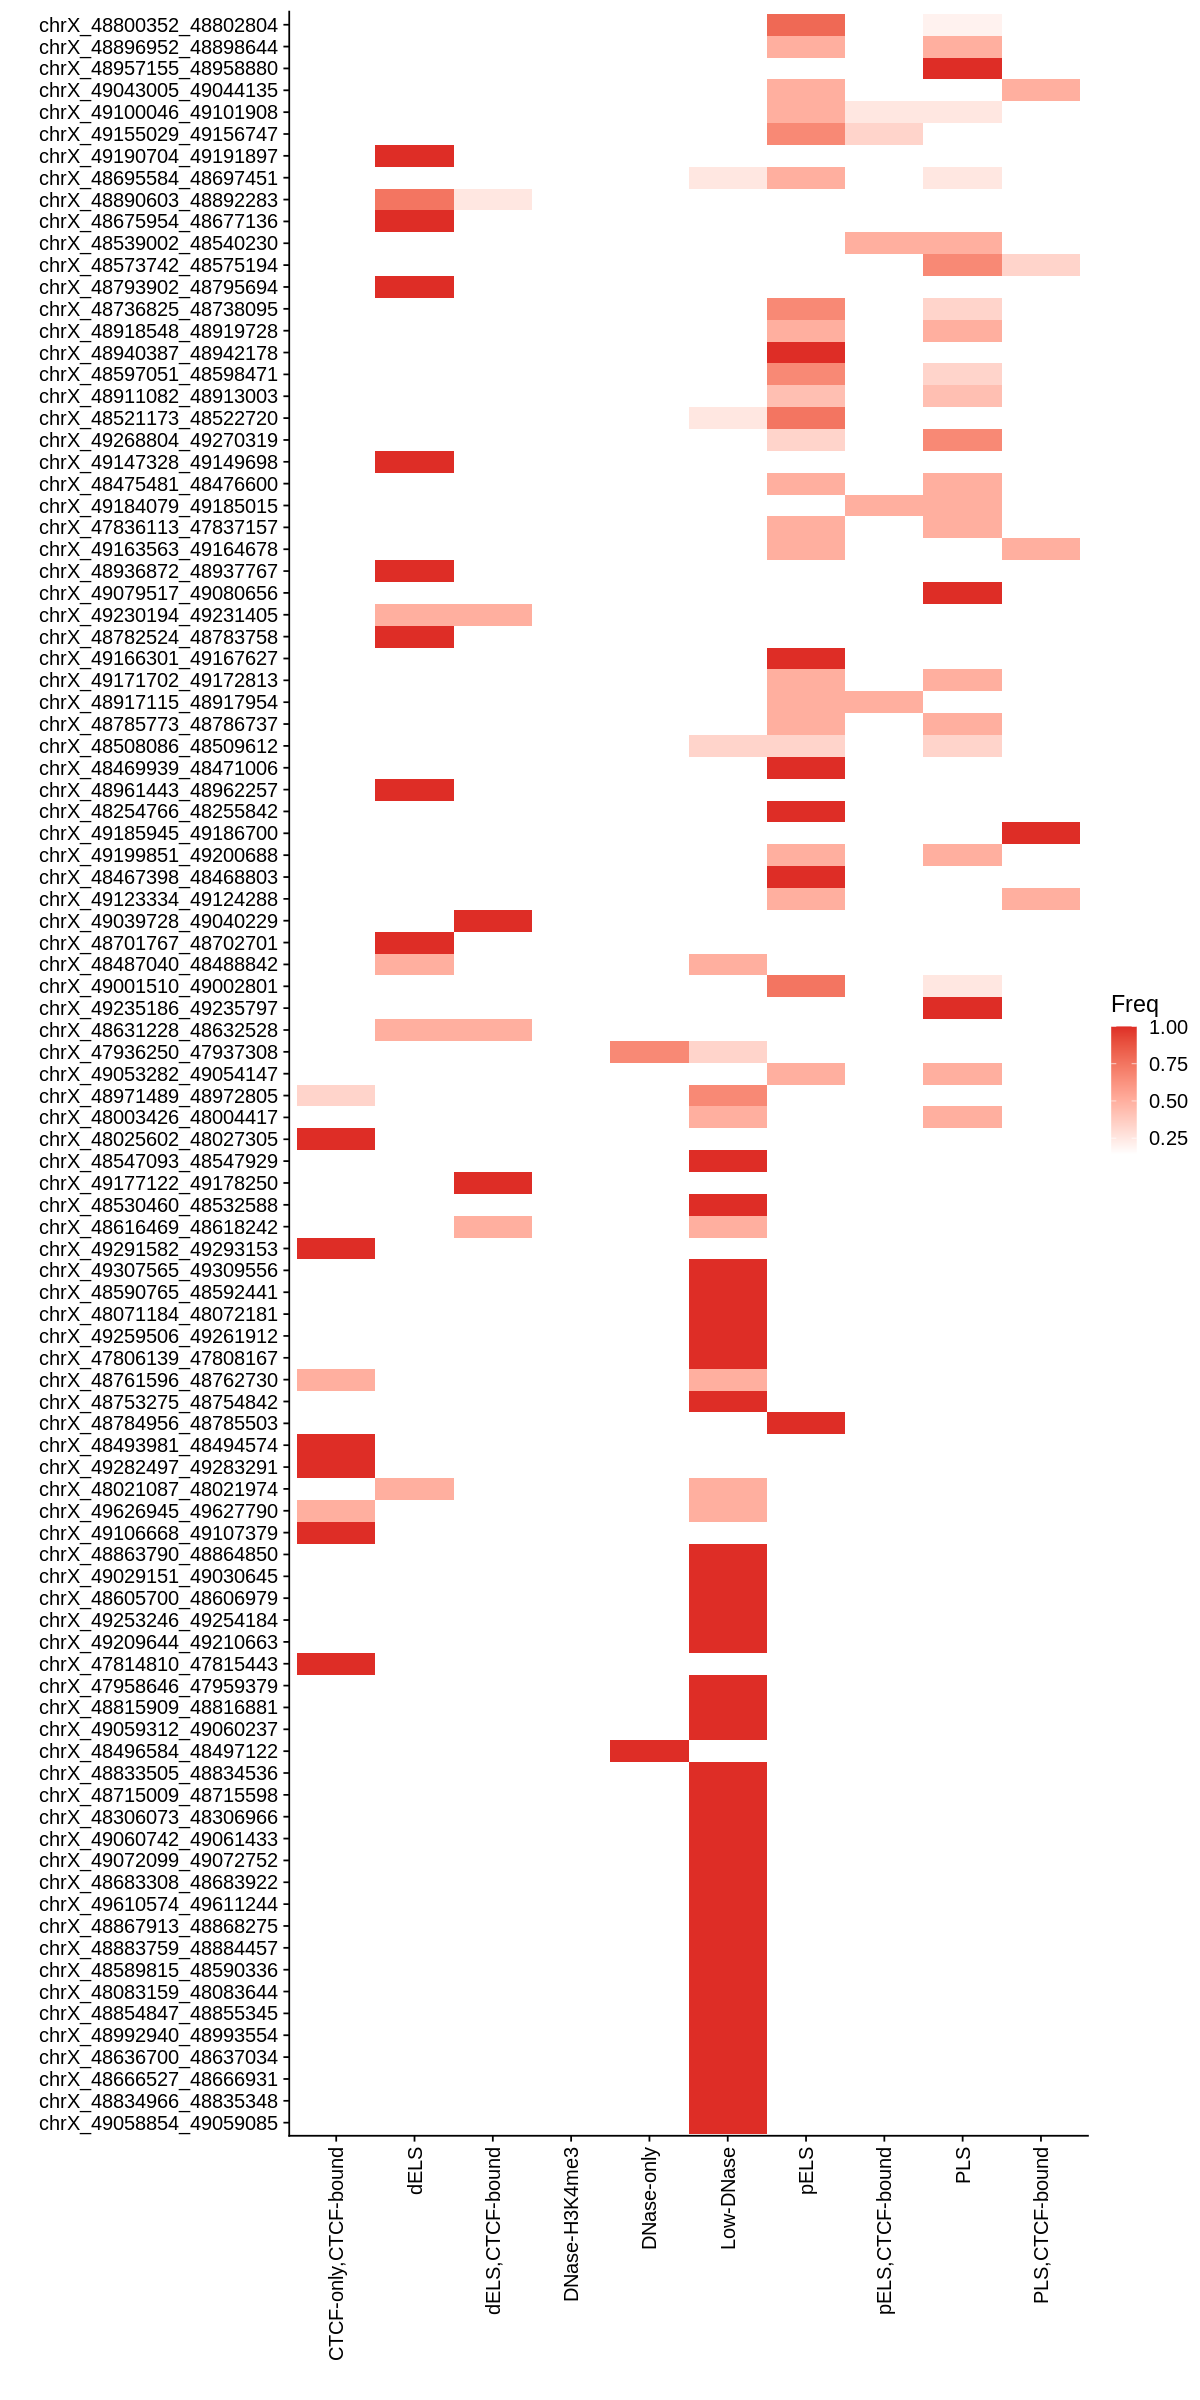

In [50]:
dat = dat_annot
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "white", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [51]:
dat = dat_cov_astarr
head(dat)

Chrom,Start,End,Region,Peak,Input,Output,Log2FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47806139,47808167,GATA1,chrX_47806139_47808167,1.6444201,14.429452,3.133366
chrX,47814810,47815443,GATA1,chrX_47814810_47815443,0.7579963,3.931249,2.374725
chrX,47836113,47837157,GATA1,chrX_47836113_47837157,6.9206893,133.943991,4.274570
chrX,47936250,47937308,GATA1,chrX_47936250_47937308,3.3391407,23.174277,2.794976
chrX,47958646,47959379,GATA1,chrX_47958646_47959379,0.7432925,3.307810,2.153874
chrX,48003426,48004417,GATA1,chrX_48003426_48004417,2.6349770,27.351127,3.375738


In [52]:
summary(dat$Output / dat$Input)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.090   5.126   6.362   7.322   8.110  19.529 

In [53]:
summary(dat$Log2FC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1248  2.3580  2.6695  2.7090  3.0197  4.2875 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


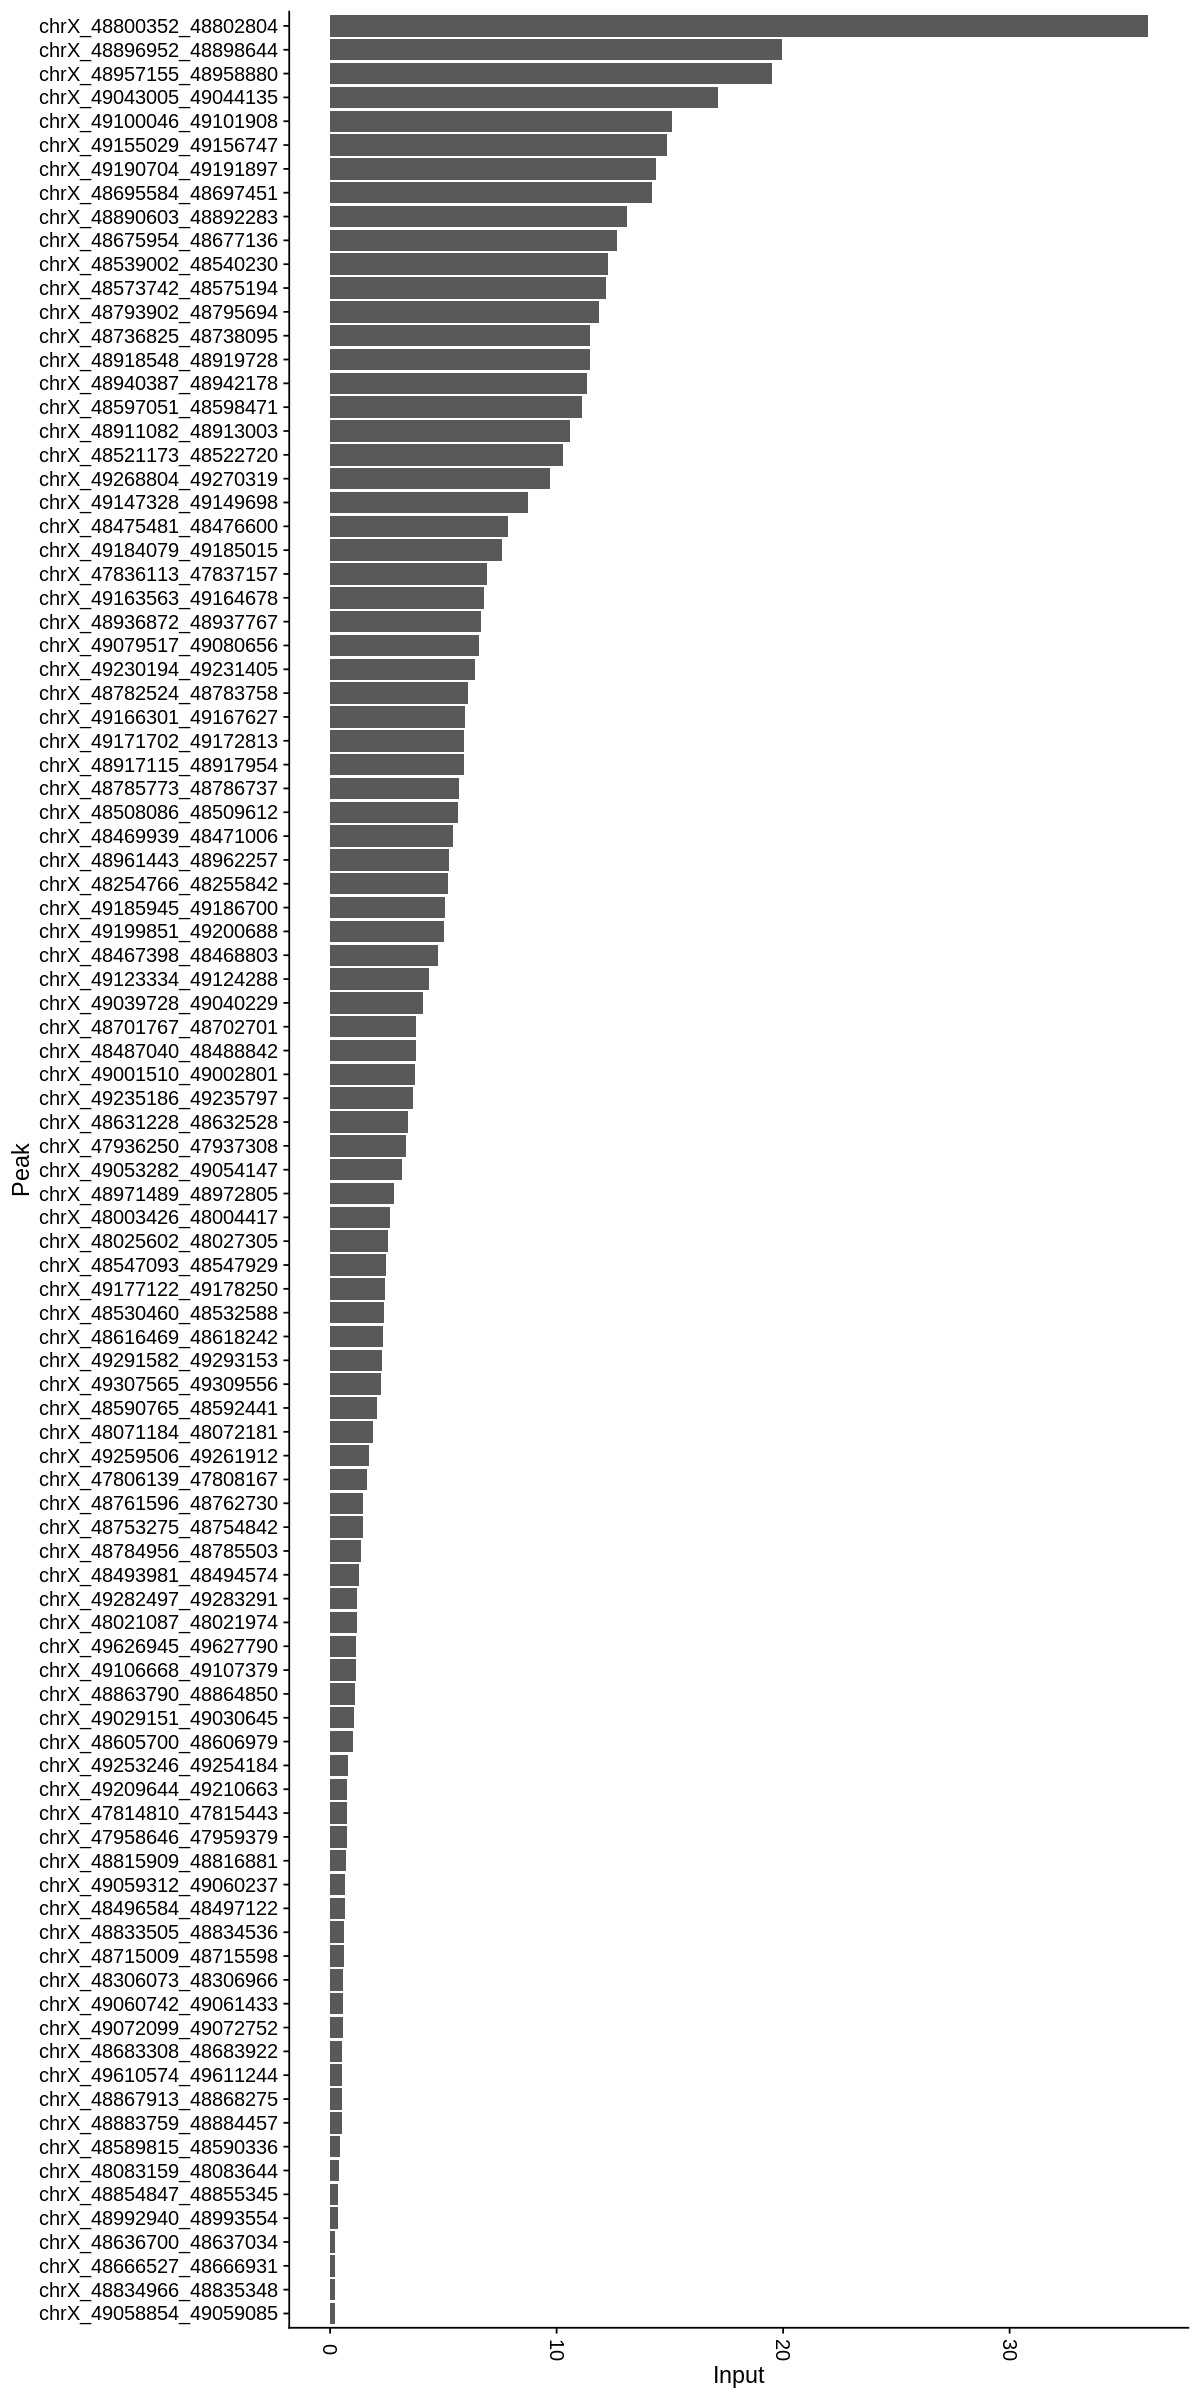

In [56]:
dat = dat_cov_astarr
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Input, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


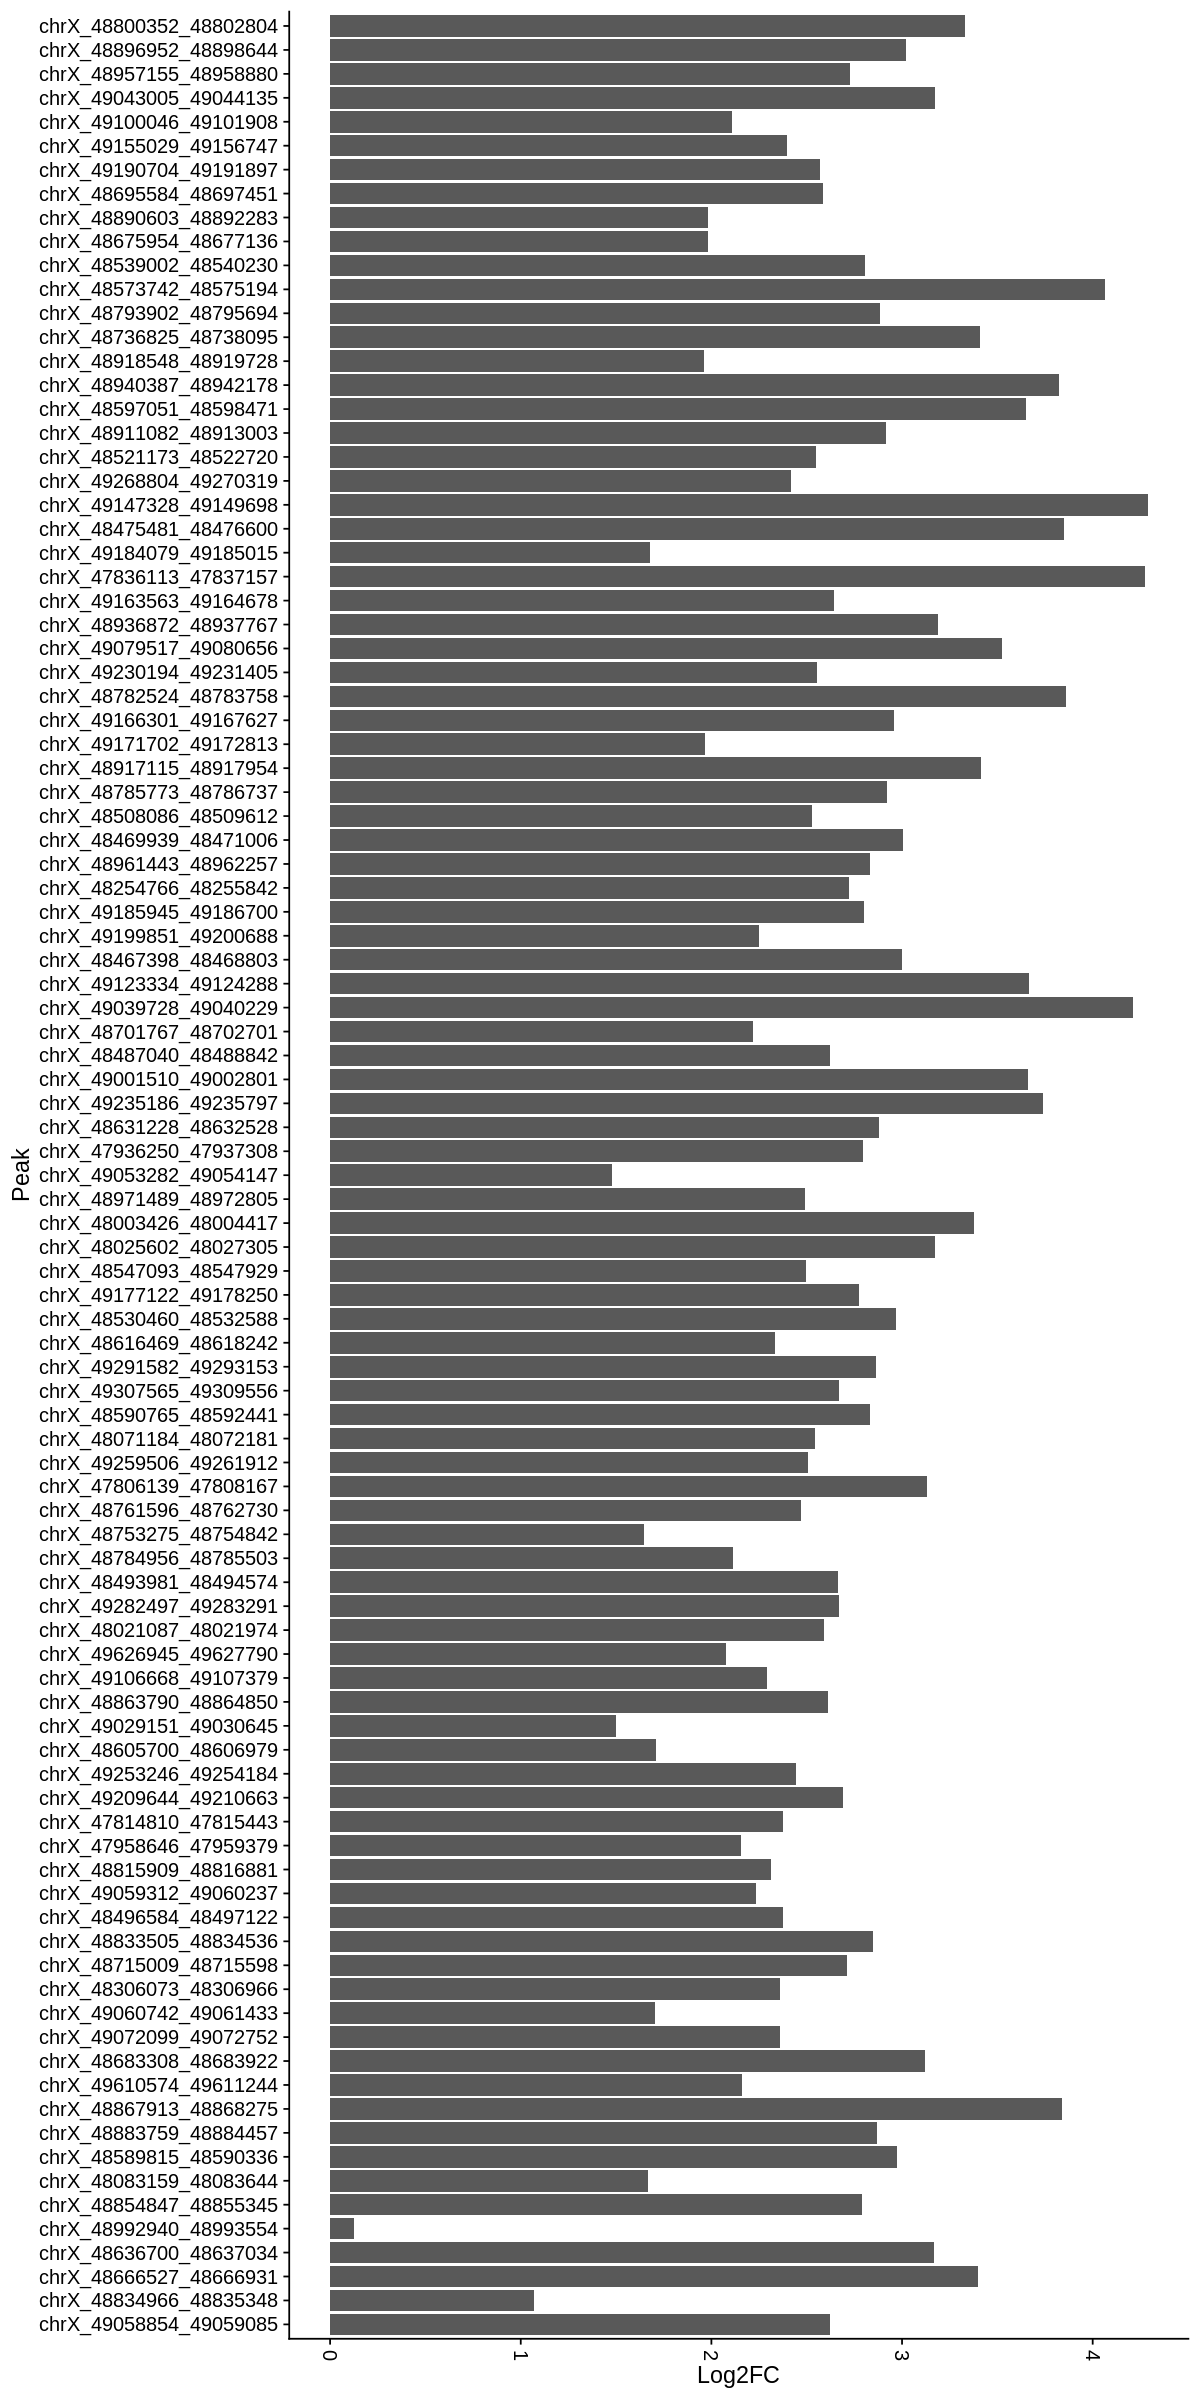

In [57]:
dat = dat_cov_astarr
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Log2FC, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


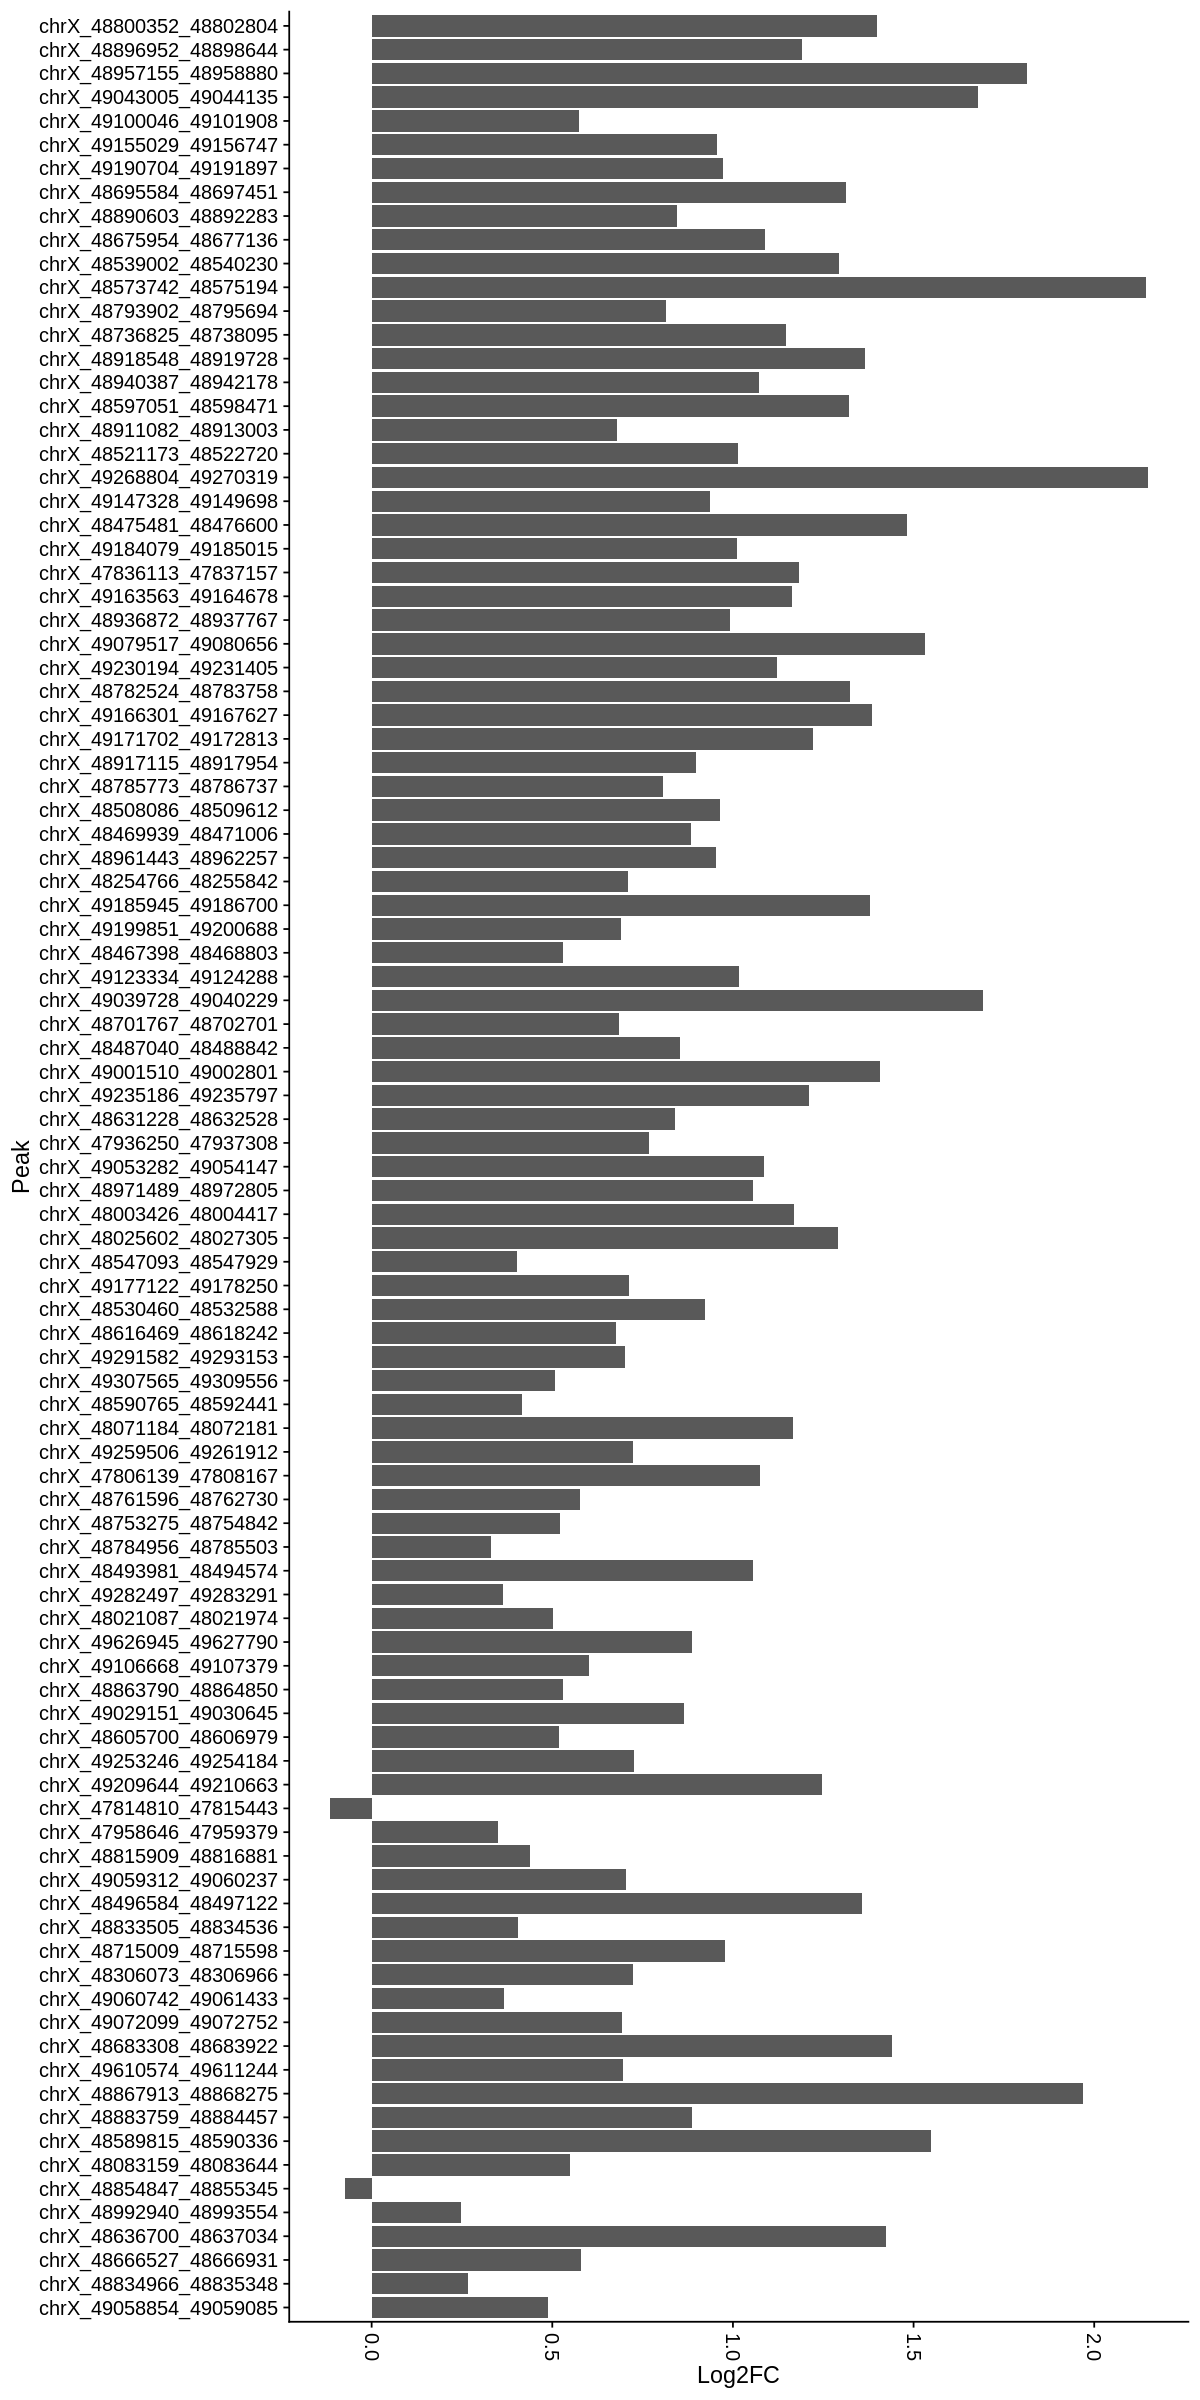

In [58]:
dat = dat_cov_wstarr
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Log2FC, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


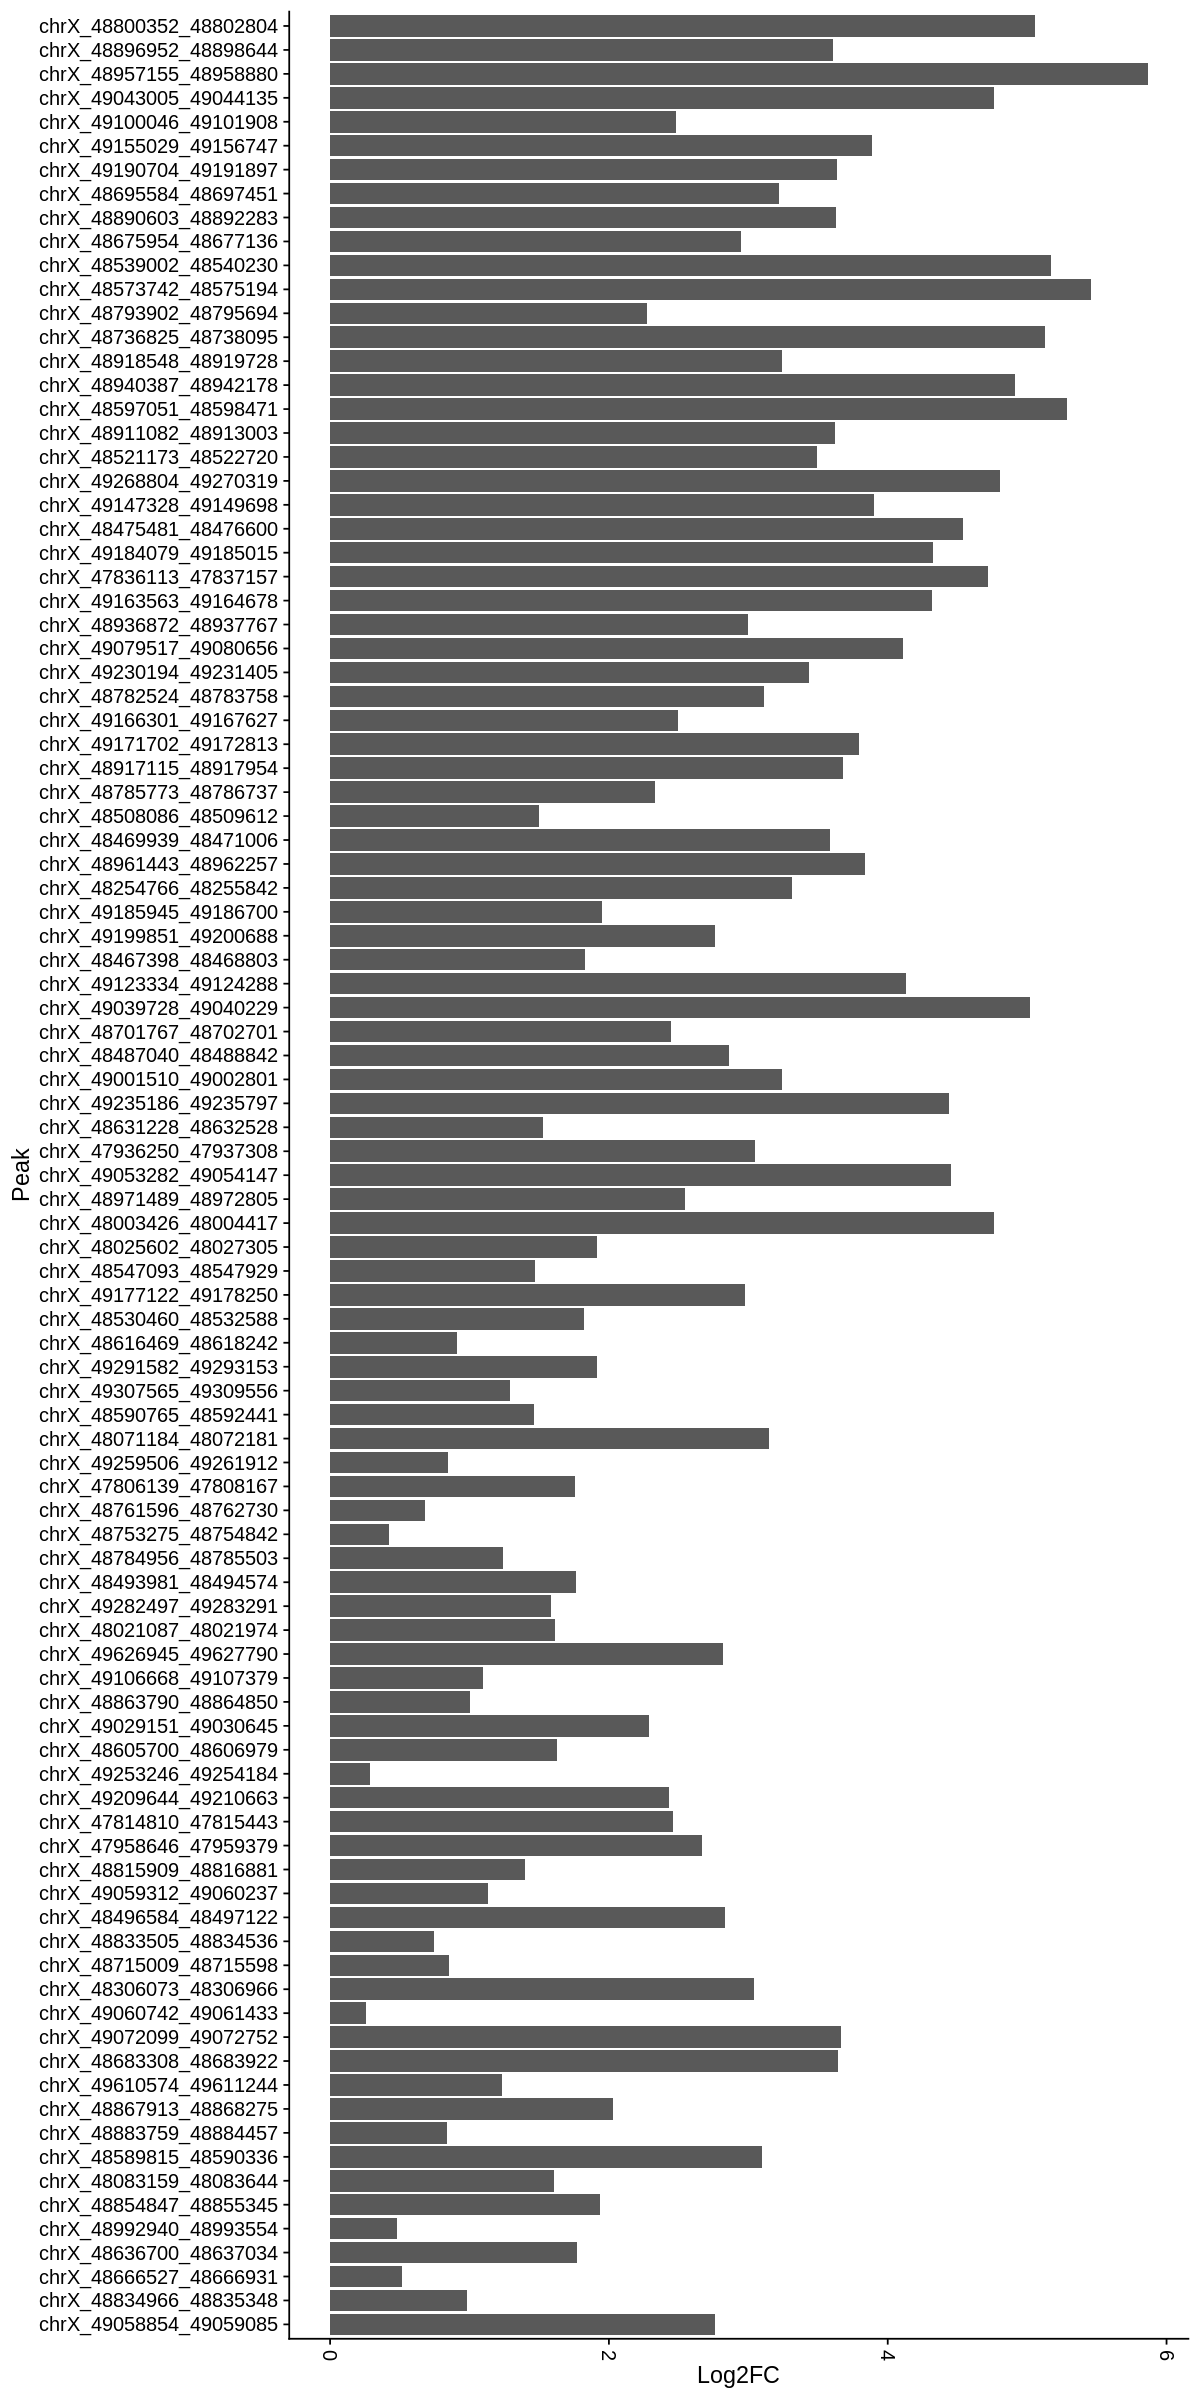

In [62]:
dat = dat_cov_tmpra
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Log2FC, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


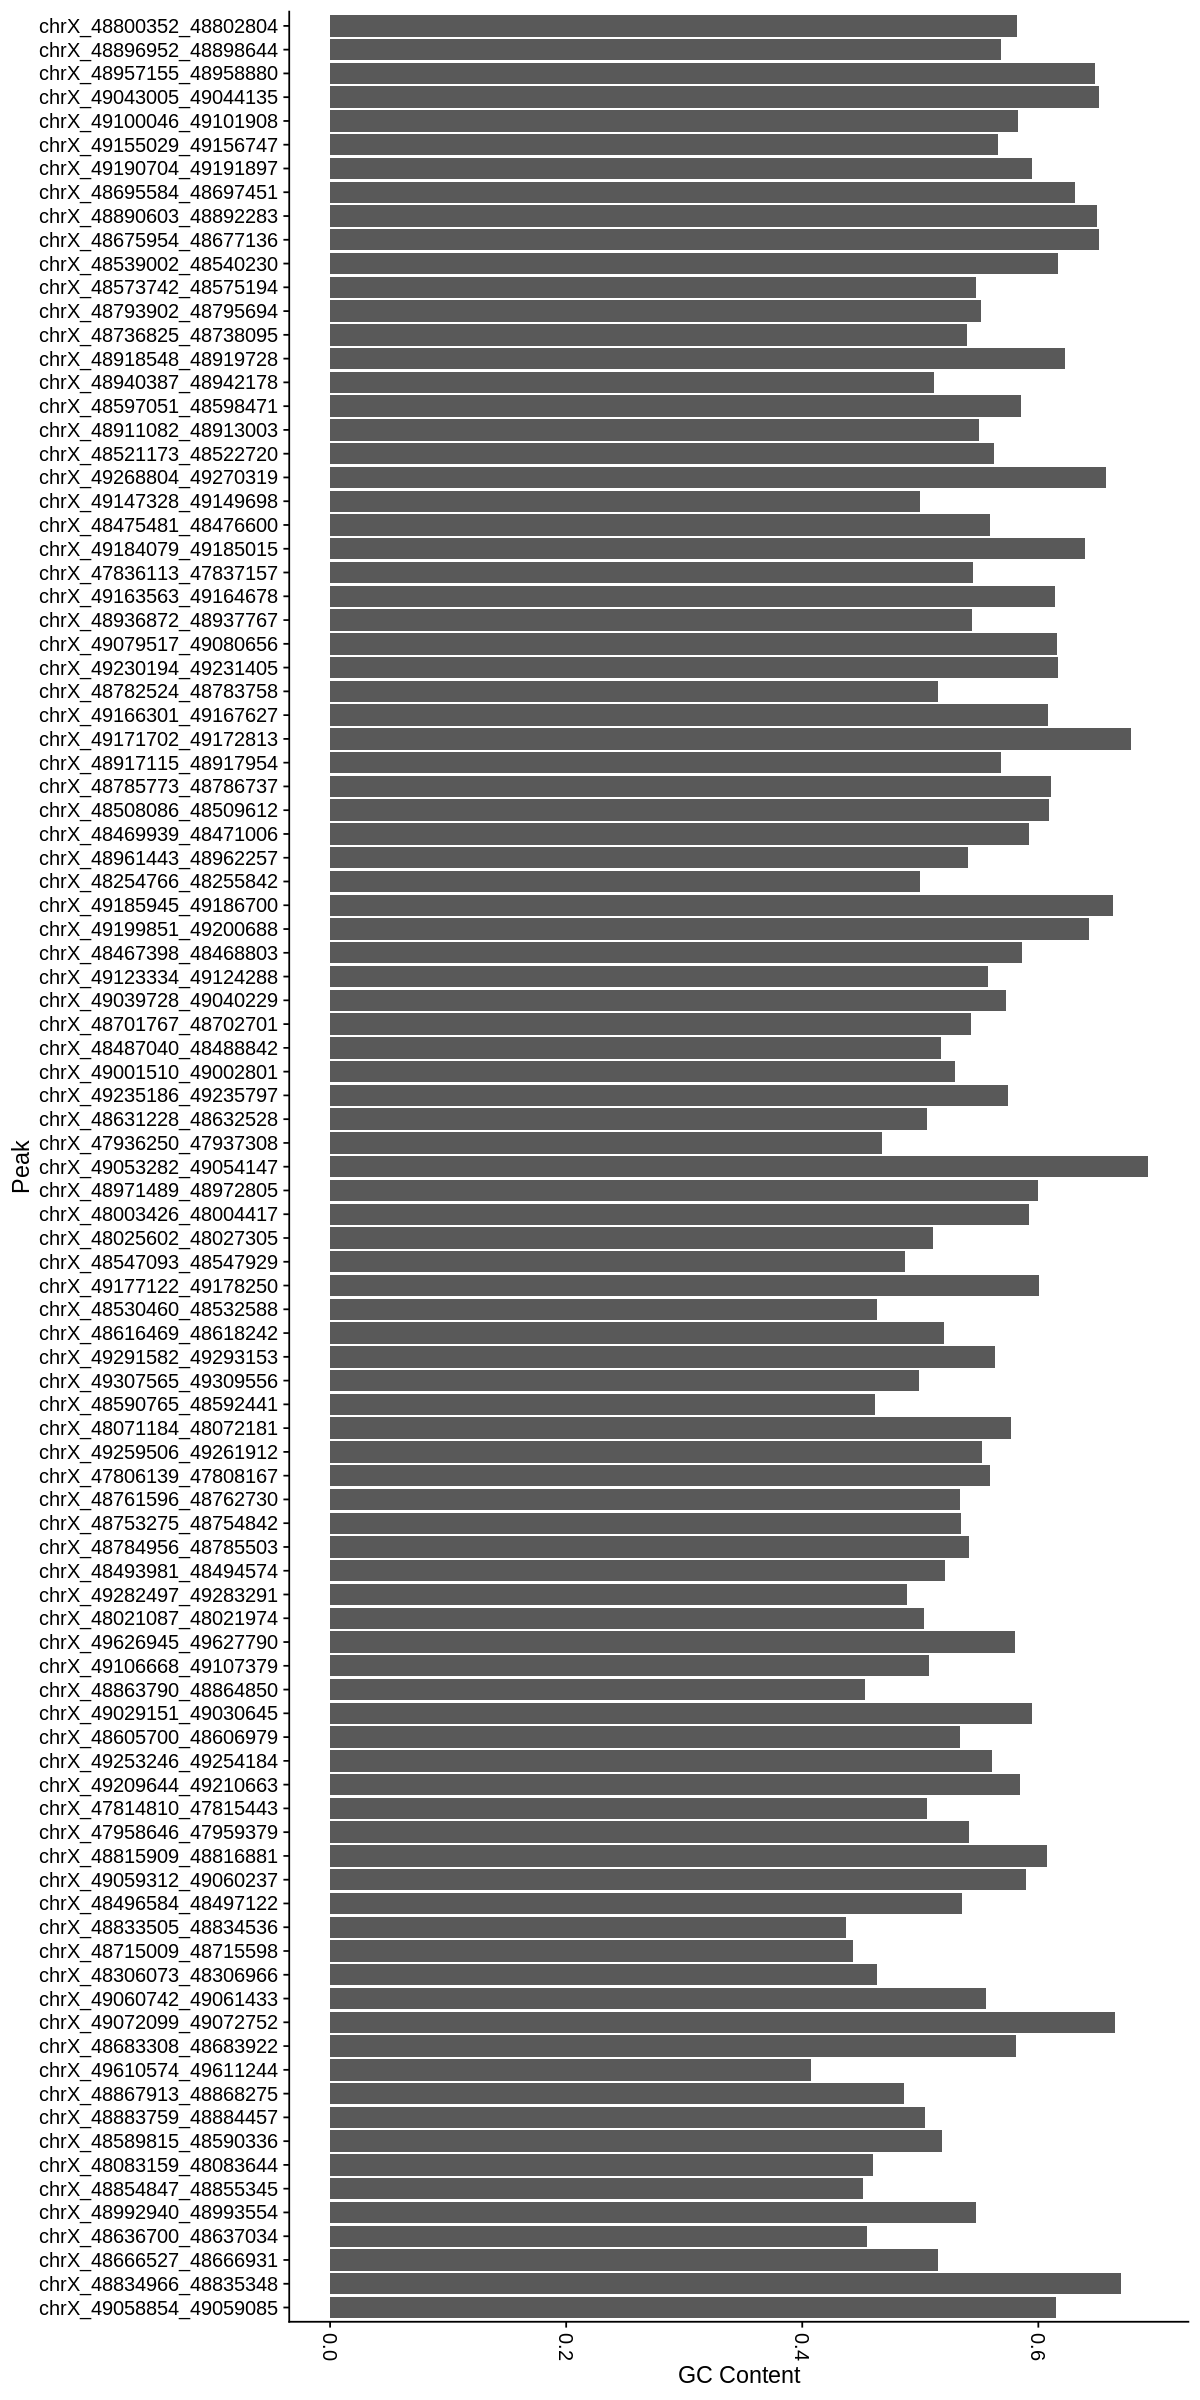

In [66]:
dat = dat_nuc
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Pct_GC, y=Peak)) + 
    geom_histogram(stat="identity") + 
    labs(x="GC Content") +
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


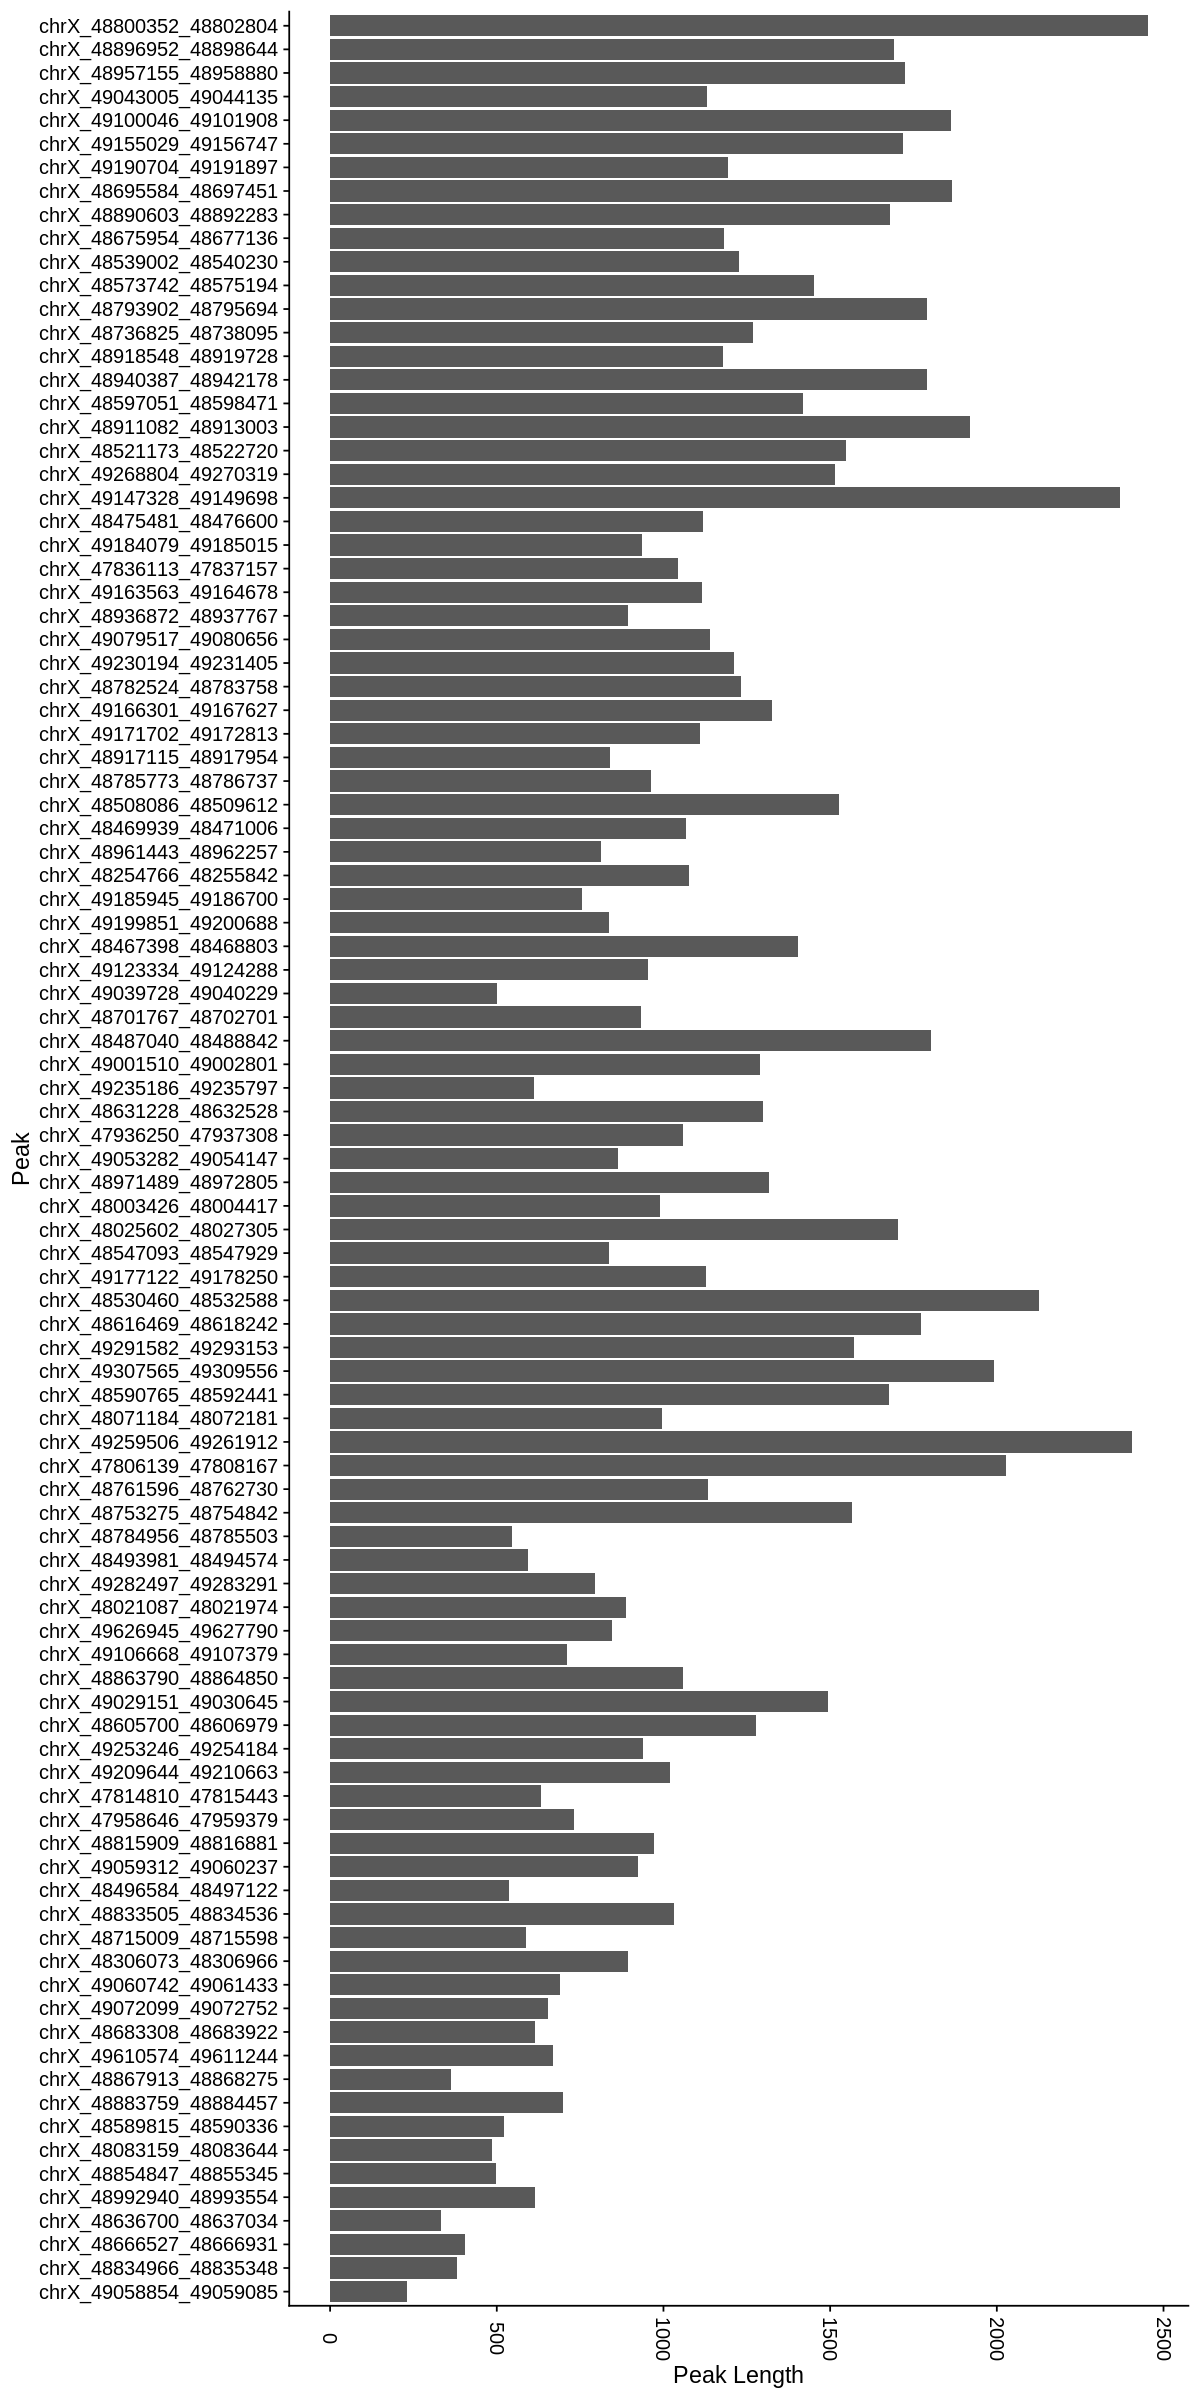

In [67]:
dat = dat_nuc
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Len, y=Peak)) + 
    geom_histogram(stat="identity") + 
    labs(x="Peak Length") +
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [91]:
dat_nuc %>% head

Peak,Chrom,Start,End,Pct_GC,Len
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47806139_47808167,chrX,47806139,47808167,0.559172,2028
chrX_47814810_47815443,chrX,47814810,47815443,0.505529,633
chrX_47836113_47837157,chrX,47836113,47837157,0.545019,1044
chrX_47936250_47937308,chrX,47936250,47937308,0.467864,1058
chrX_47958646_47959379,chrX,47958646,47959379,0.541610,733
chrX_48003426_48004417,chrX,48003426,48004417,0.592331,991


In [128]:
dat1 = dat_cov_astarr %>% mutate(ASTARR=Log2FC) %>% dplyr::select(Peak, ASTARR) 
dat2 = dat_cov_wstarr %>% mutate(WSTARR=Log2FC) %>% dplyr::select(Peak, WSTARR)
dat3 = dat_cov_tmpra  %>% mutate(TMPRA =Log2FC) %>% dplyr::select(Peak, TMPRA)
dat4 = dat_nuc %>% dplyr::select(Peak, Pct_GC)

dat = dat1 %>% 
    left_join(dat2, by="Peak") %>% 
    left_join(dat3, by="Peak") %>% 
    left_join(dat4, by="Peak")
    
head(dat)

Peak,ASTARR,WSTARR,TMPRA,Pct_GC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47806139_47808167,3.133366,1.0752961,1.755022,0.559172
chrX_47814810_47815443,2.374725,-0.1149994,2.458260,0.505529
chrX_47836113_47837157,4.274570,1.1840686,4.719739,0.545019
chrX_47936250_47937308,2.794976,0.7670180,3.046794,0.467864
chrX_47958646_47959379,2.153874,0.3502388,2.668684,0.541610
chrX_48003426_48004417,3.375738,1.1688417,4.765535,0.592331


In [137]:
print(dim(dat))
print(length(unique(dat$Peak)))

[1] 97  5
[1] 97


`geom_smooth()` using formula 'y ~ x'



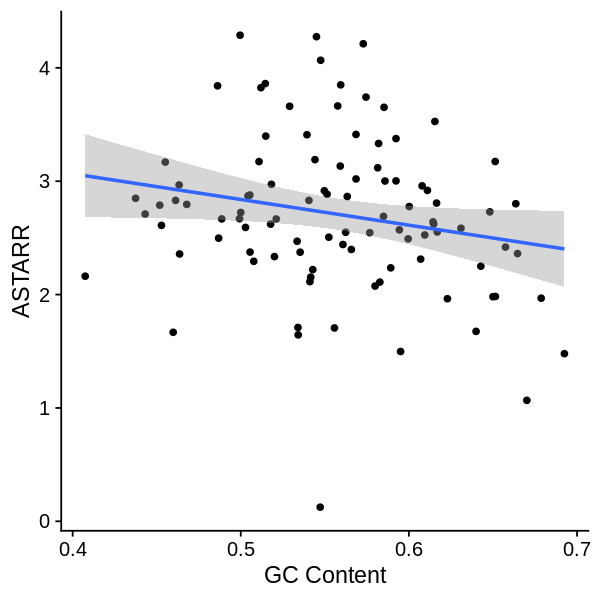

In [138]:
gpt = ggplot(dat, aes(x=Pct_GC, y=ASTARR)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot() + labs(x="GC Content")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

`geom_smooth()` using formula 'y ~ x'



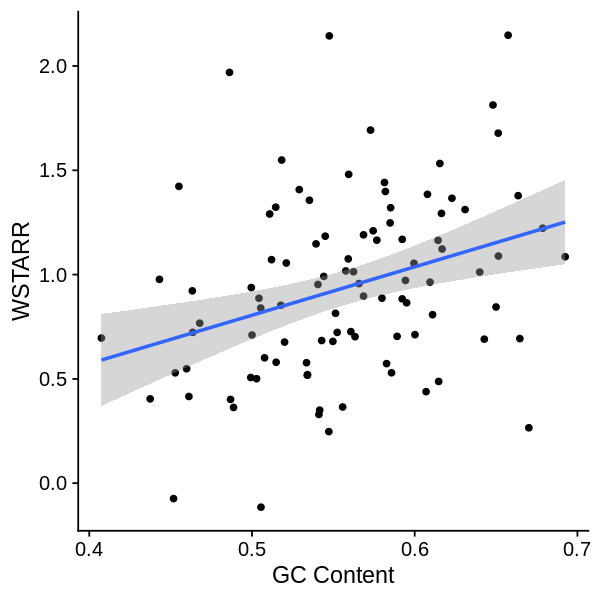

In [139]:
gpt = ggplot(dat, aes(x=Pct_GC, y=WSTARR)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()+ labs(x="GC Content")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

`geom_smooth()` using formula 'y ~ x'



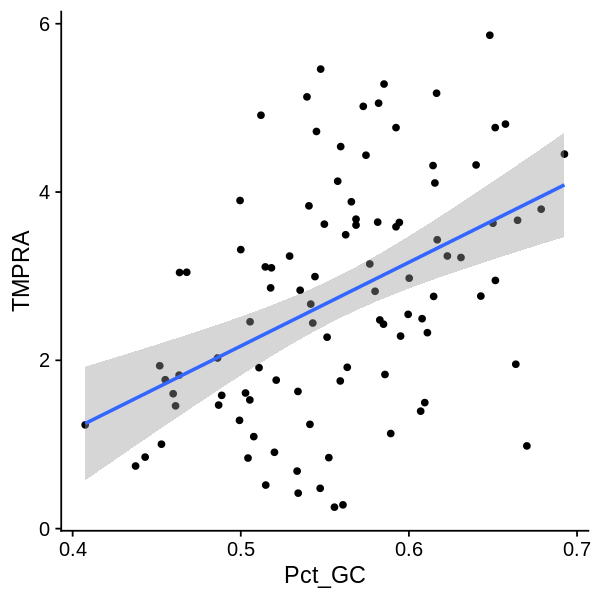

In [140]:
gpt = ggplot(dat, aes(x=Pct_GC, y=TMPRA)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

---

`geom_smooth()` using formula 'y ~ x'



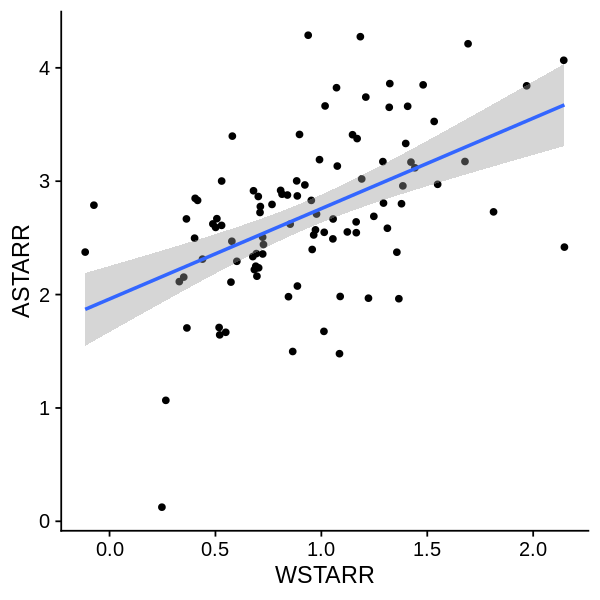

In [141]:
gpt = ggplot(dat, aes(x=WSTARR, y=ASTARR)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

`geom_smooth()` using formula 'y ~ x'



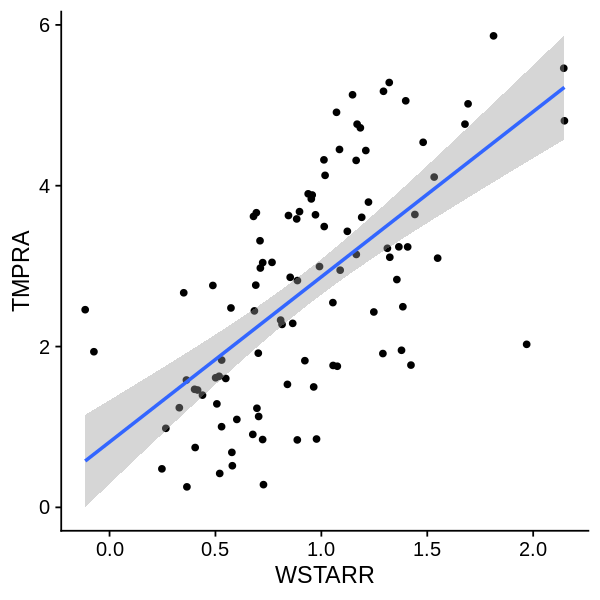

In [142]:
gpt = ggplot(dat, aes(x=WSTARR, y=TMPRA)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

`geom_smooth()` using formula 'y ~ x'



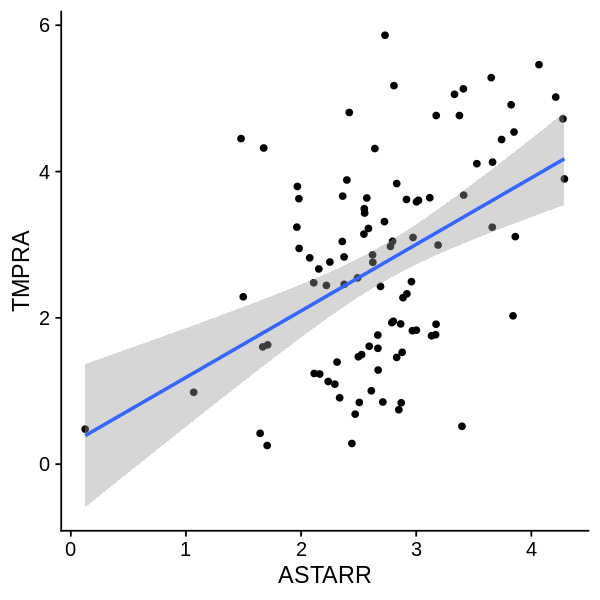

In [143]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [144]:
fit = lm(ASTARR~WSTARR, data = dat)
summary(fit)


Call:
lm(formula = ASTARR ~ WSTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03340 -0.28651  0.00166  0.34393  1.57881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9611     0.1469  13.347   <2e-16 ***
WSTARR        0.7972     0.1421   5.609    2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6076 on 95 degrees of freedom
Multiple R-squared:  0.2488,	Adjusted R-squared:  0.2409 
F-statistic: 31.46 on 1 and 95 DF,  p-value: 1.999e-07


In [145]:
fit = lm(TMPRA~WSTARR, data = dat)
summary(fit)


Call:
lm(formula = TMPRA ~ WSTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83010 -0.89529 -0.09992  0.95914  1.96163 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.8129     0.2624   3.098  0.00256 ** 
WSTARR        2.0540     0.2539   8.090 1.94e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.085 on 95 degrees of freedom
Multiple R-squared:  0.4079,	Adjusted R-squared:  0.4017 
F-statistic: 65.45 on 1 and 95 DF,  p-value: 1.941e-12


In [146]:
fit = lm(TMPRA~ASTARR, data = dat)
summary(fit)


Call:
lm(formula = TMPRA ~ ASTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8479 -1.0755  0.1199  0.7632  3.1050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2772     0.5149   0.538    0.592    
ASTARR        0.9091     0.1841   4.937 3.39e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.258 on 95 degrees of freedom
Multiple R-squared:  0.2042,	Adjusted R-squared:  0.1958 
F-statistic: 24.37 on 1 and 95 DF,  p-value: 3.388e-06


---

In [125]:
dat1 = dat_cov_astarr %>% mutate(ASTARR=Log2FC) %>% dplyr::select(Peak, ASTARR) 
dat2 = dat_cov_wstarr %>% mutate(WSTARR=Log2FC) %>% dplyr::select(Peak, WSTARR)
dat3 = dat_cov_tmpra  %>% mutate(TMPRA =Log2FC) %>% dplyr::select(Peak, TMPRA)
dat4 = dat_annot
dat5 = dat_nuc %>% dplyr::select(Peak, Pct_GC)
dat = dat1 %>% 
    left_join(dat2, by="Peak") %>% 
    left_join(dat3, by="Peak") %>% 
    left_join(dat4, by="Peak") %>%
    left_join(dat5, by="Peak")
    
head(dat)

Peak,ASTARR,WSTARR,TMPRA,Chrom,Start,End,Len,Label,Count,Total,Freq,Pct_GC
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47806139_47808167,3.133366,1.0752961,1.755022,chrX,47806139,47808167,2028,Low-DNase,3,3,1.0000000,0.559172
chrX_47814810_47815443,2.374725,-0.1149994,2.458260,chrX,47814810,47815443,633,"CTCF-only,CTCF-bound",1,1,1.0000000,0.505529
chrX_47836113_47837157,4.274570,1.1840686,4.719739,chrX,47836113,47837157,1044,pELS,1,2,0.5000000,0.545019
chrX_47836113_47837157,4.274570,1.1840686,4.719739,chrX,47836113,47837157,1044,PLS,1,2,0.5000000,0.545019
chrX_47936250_47937308,2.794976,0.7670180,3.046794,chrX,47936250,47937308,1058,DNase-only,2,3,0.6666667,0.467864
chrX_47936250_47937308,2.794976,0.7670180,3.046794,chrX,47936250,47937308,1058,Low-DNase,1,3,0.3333333,0.467864


In [126]:
print(dim(dat))
print(length(unique(dat$Peak)))

[1] 138  13
[1] 97


`geom_smooth()` using formula 'y ~ x'



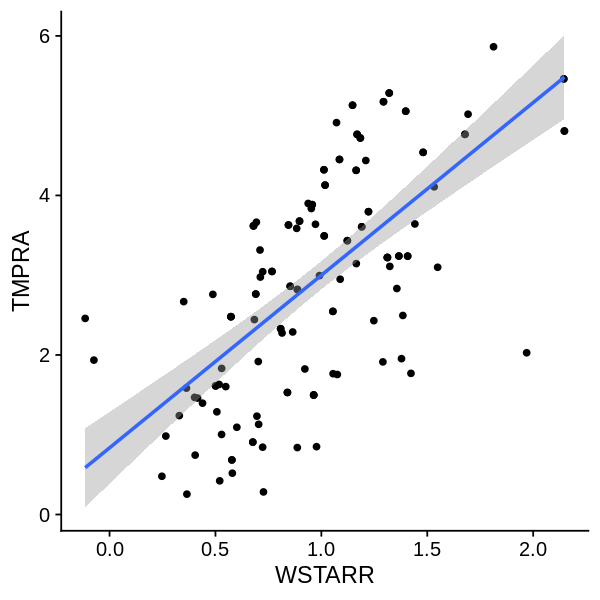

In [95]:
gpt = ggplot(dat, aes(x=WSTARR, y=TMPRA)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

`geom_smooth()` using formula 'y ~ x'



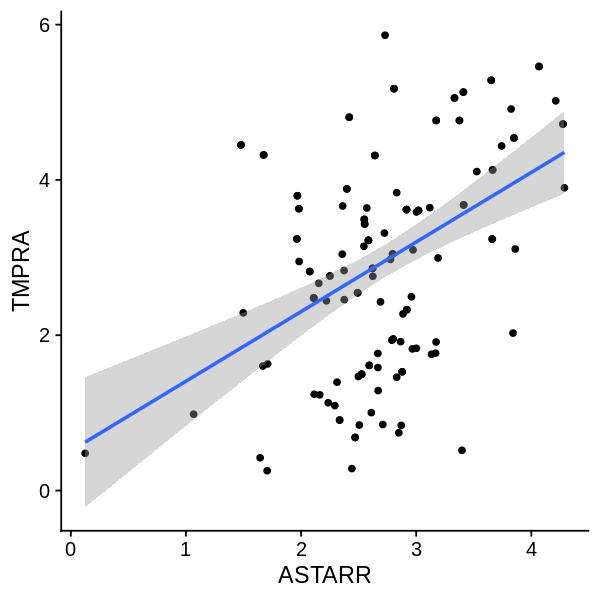

In [106]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + geom_point() + geom_smooth(method = "lm") + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)


Call:
lm(formula = ASTARR ~ WSTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04518 -0.28982 -0.00988  0.37993  1.59486 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9828     0.1301  15.241  < 2e-16 ***
WSTARR        0.7570     0.1222   6.193 6.54e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6031 on 136 degrees of freedom
Multiple R-squared:   0.22,	Adjusted R-squared:  0.2142 
F-statistic: 38.36 on 1 and 136 DF,  p-value: 6.542e-09



Call:
lm(formula = TMPRA ~ WSTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06960 -0.66797  0.03992  0.95515  1.87133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.8358     0.2276   3.672 0.000344 ***
WSTARR        2.1640     0.2138  10.121  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 136 degrees of freedom
Multiple R-squared:  0.4296,	Adjusted R-squared:  0.4254 
F-statistic: 102.4 on 1 and 136 DF,  p-value: < 2.2e-16



Call:
lm(formula = TMPRA ~ ASTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0389 -1.1658  0.1508  0.7731  2.9055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5115     0.4425   1.156     0.25    
ASTARR        0.8963     0.1577   5.684 7.67e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.256 on 136 degrees of freedom
Multiple R-squared:  0.192,	Adjusted R-squared:  0.186 
F-statistic: 32.31 on 1 and 136 DF,  p-value: 7.673e-08


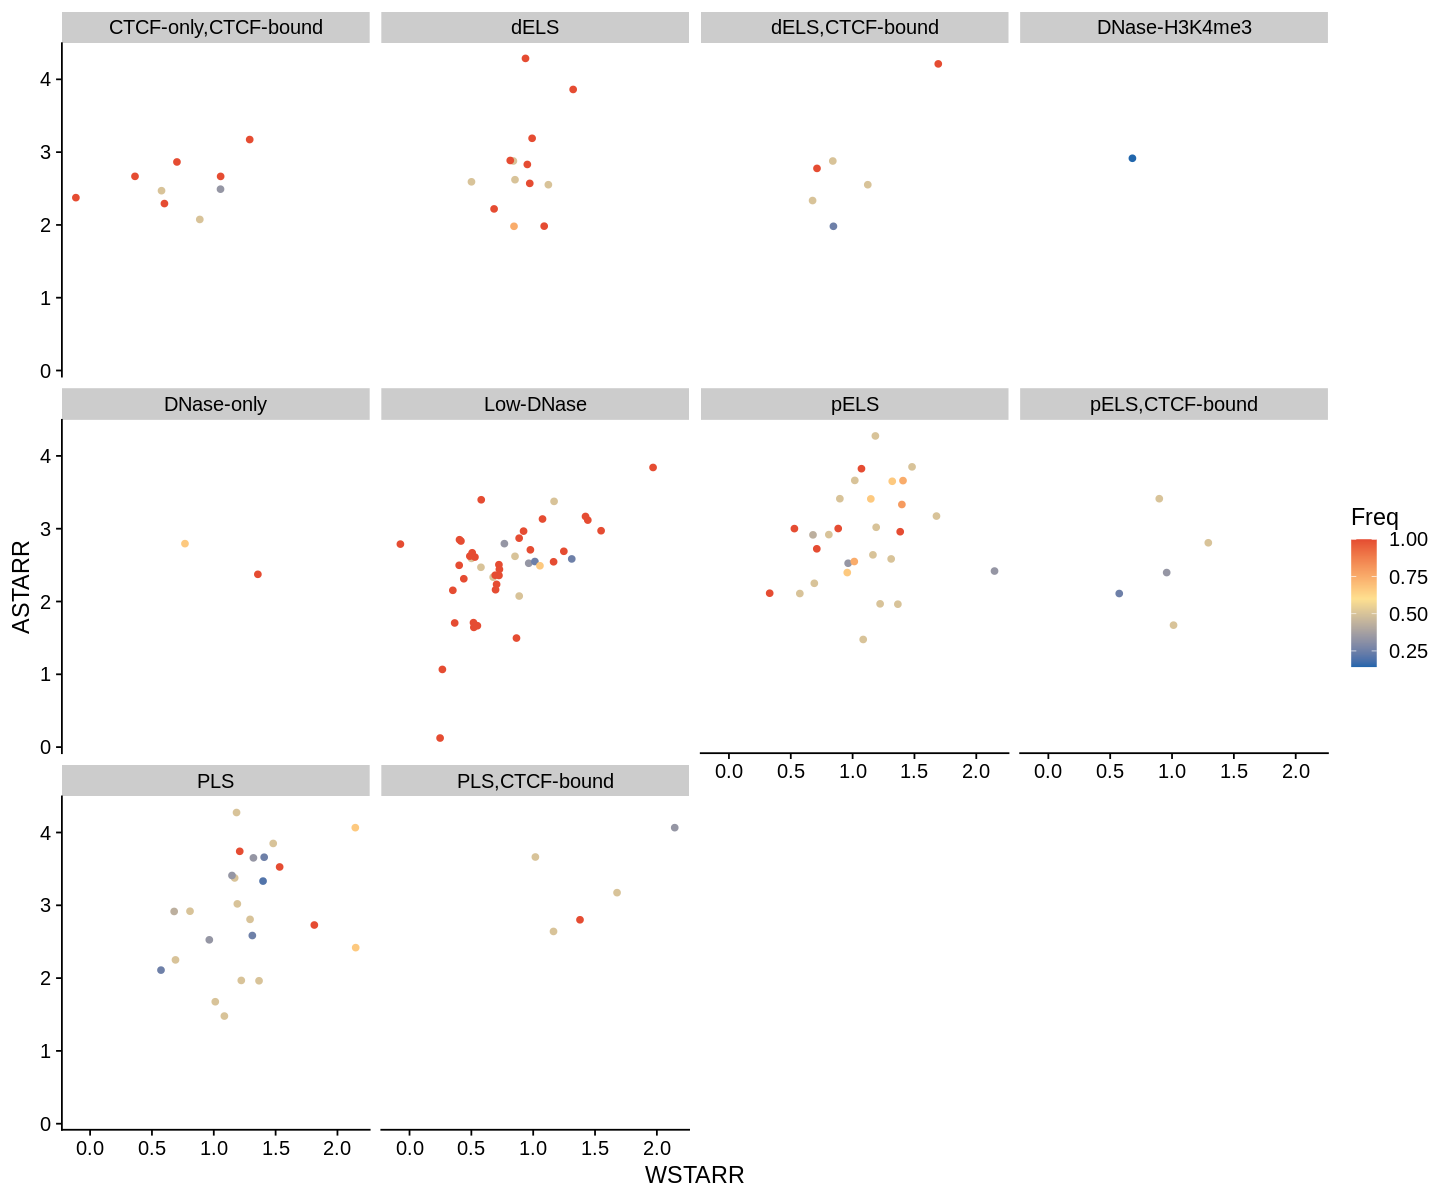

In [117]:
gpt = ggplot(dat, aes(x=WSTARR, y=ASTARR, color=Freq)) + 
    geom_point() + 
    scale_color_gradient2(low = "#2166ac", mid="#fee090", high = "#de2d26", midpoint=0.6) +
    theme_cowplot() +
    facet_wrap(~Label)

options(repr.plot.height=10, repr.plot.width=12)
print(gpt)

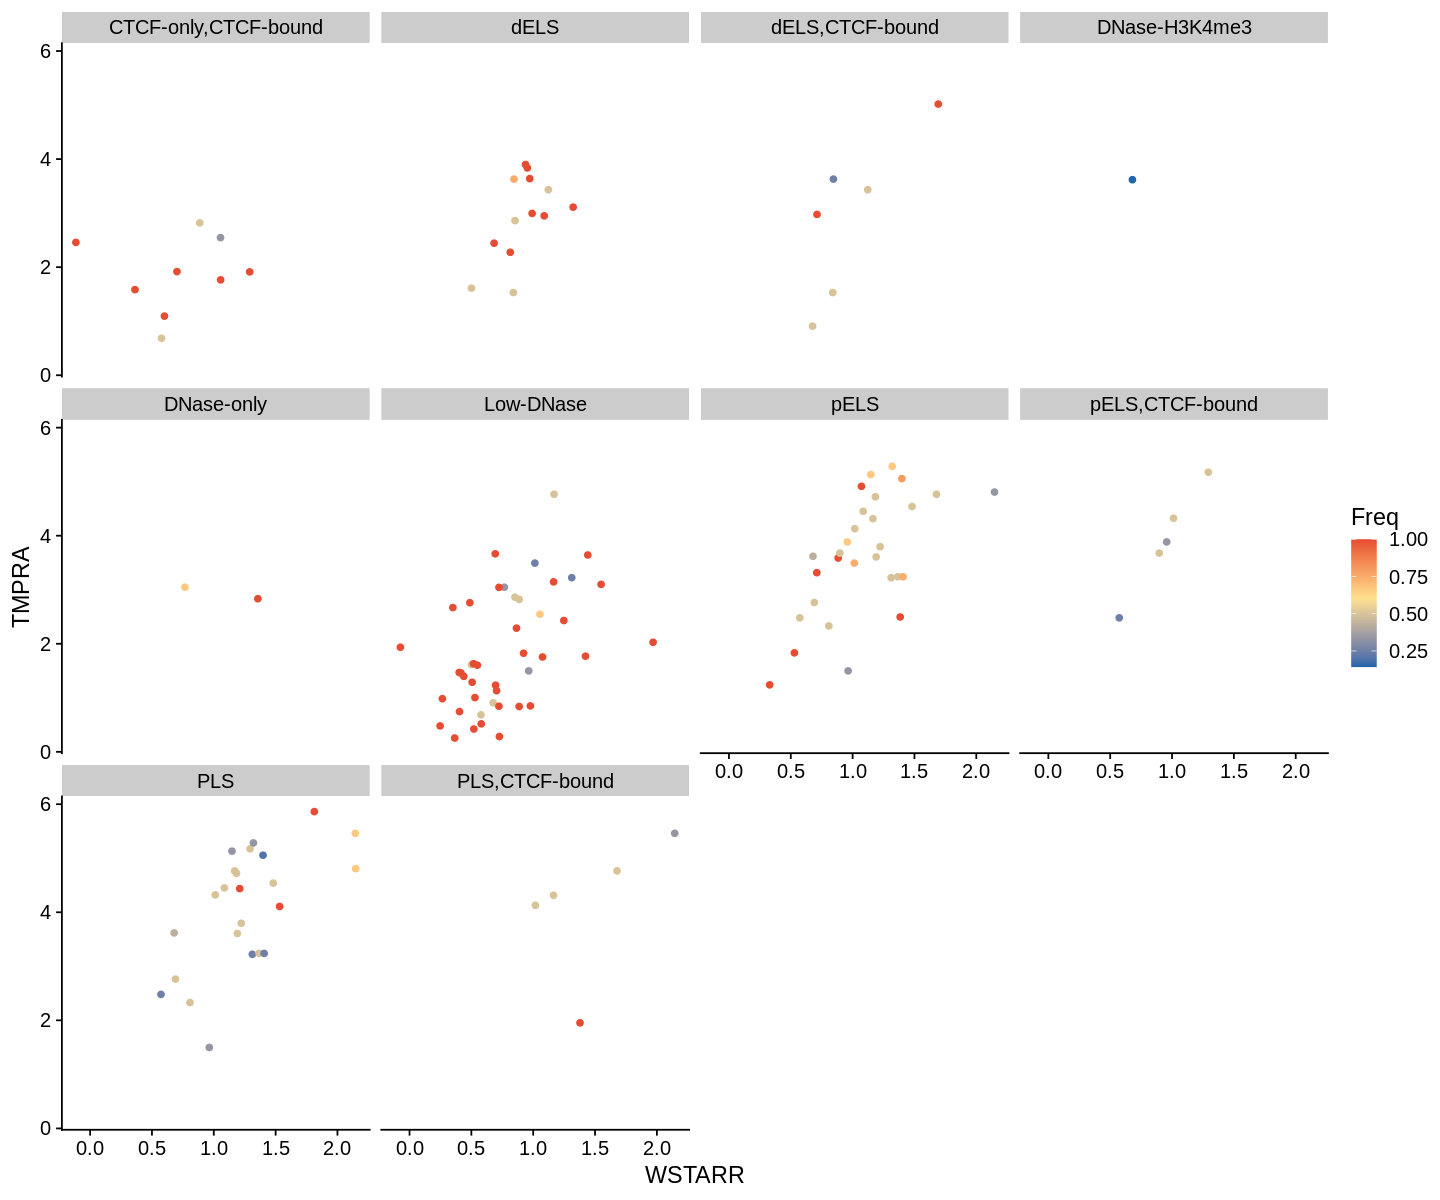

In [120]:
gpt = ggplot(dat, aes(x=WSTARR, y=TMPRA, color=Freq)) + 
    geom_point() + 
    scale_color_gradient2(low = "#2166ac", mid="#fee090", high = "#de2d26", midpoint=0.6) +
    theme_cowplot() +
    facet_wrap(~Label)

options(repr.plot.height=10, repr.plot.width=12)
print(gpt)

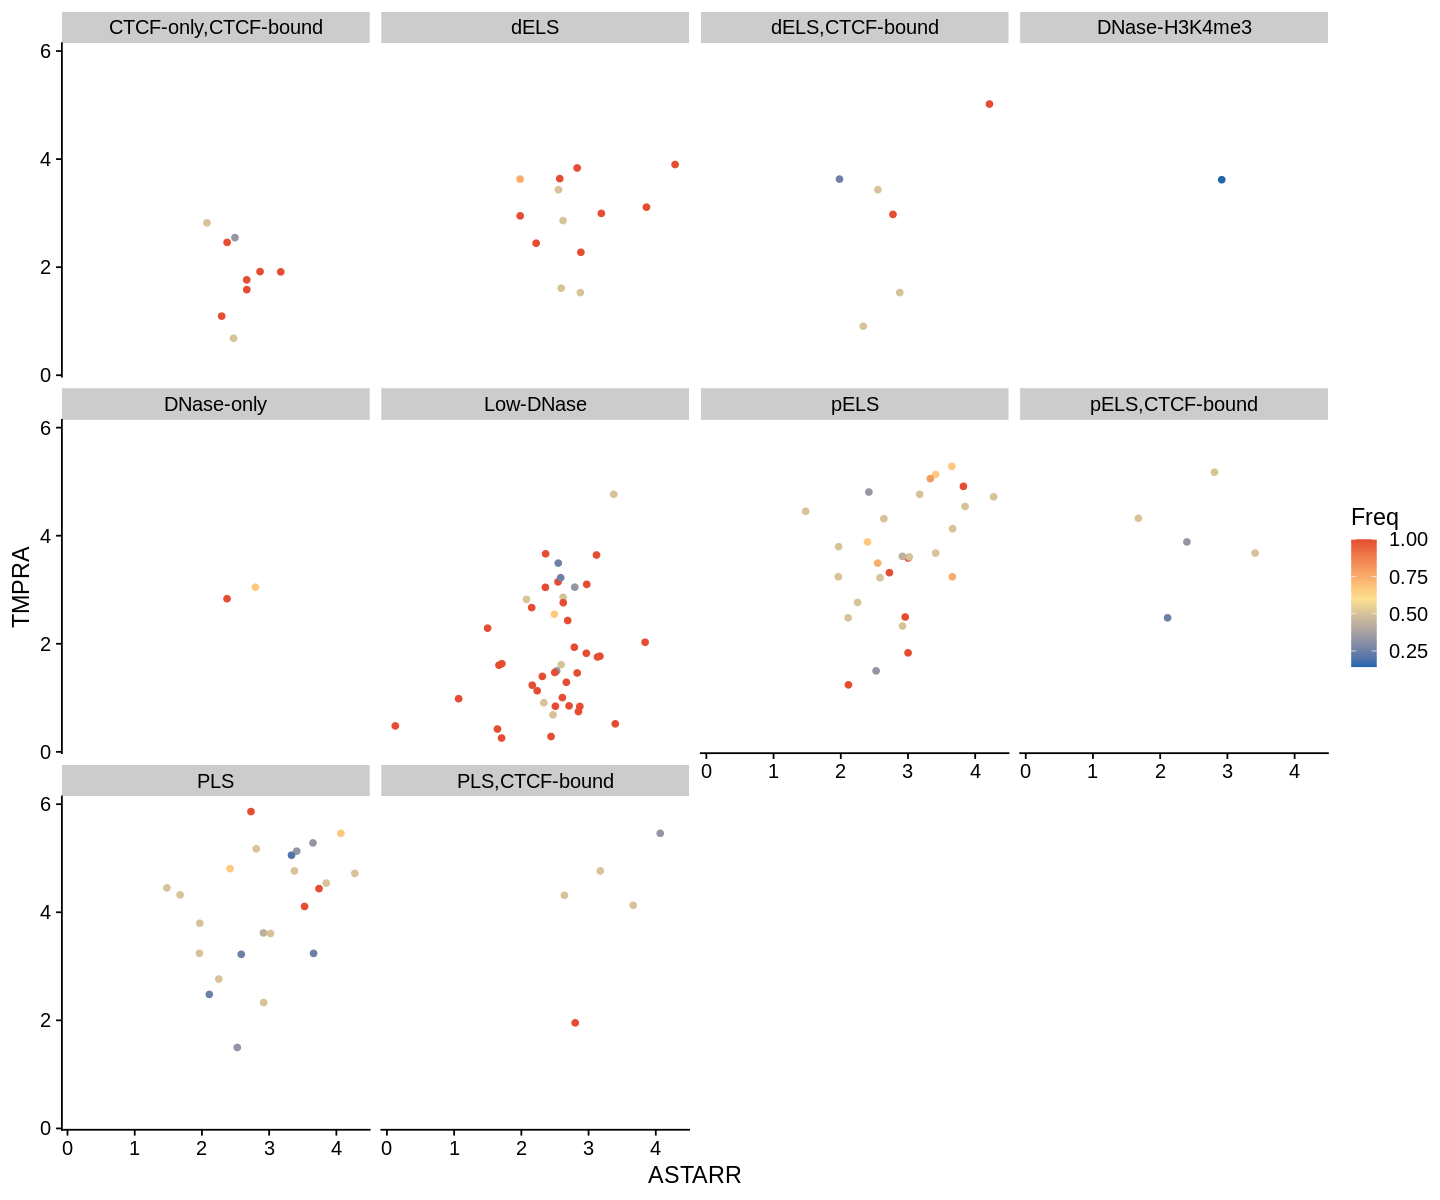

In [121]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA, color=Freq)) + 
    geom_point() + 
    scale_color_gradient2(low = "#2166ac", mid="#fee090", high = "#de2d26", midpoint=0.6) +
    theme_cowplot() +
    facet_wrap(~Label)

options(repr.plot.height=10, repr.plot.width=12)
print(gpt)

In [ ]:
dat = dat_wstarr_gata1_inp
dat = dat %>% dplyr::filter(Peak %in% peaks)
dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Cpm)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=30) 
print(gpt)

In [80]:
PREFIX = "A001_K562_WSTARRseq"
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "A001_K562_WSTARRseq_Input.GATA1.tsv"
fpath = file.path(fdiry, fname)
dat_wstarr_gata1_inp = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "A001_K562_WSTARRseq_Output.GATA1.tsv"
fpath = file.path(fdiry, fname)
dat_wstarr_gata1_out = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

Rows: 197 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Group
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 197 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Group
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [81]:
head(dat_wstarr_gata1_inp)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Input,0.3247631,chrX_47796208_47796828
chrX,47806139,47808167,Input,1.1872734,chrX_47806139_47808167
chrX,47809119,47809445,Input,0.3040593,chrX_47809119_47809445
chrX,47814810,47815443,Input,0.4153798,chrX_47814810_47815443
chrX,47816459,47818070,Input,0.5772542,chrX_47816459_47818070
chrX,47836113,47837157,Input,0.5702524,chrX_47836113_47837157


In [84]:
dat = dat_wstarr_gata1_out %>% dplyr::filter(Peak %in% peaks)
head(dat)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Output,0.3370474,chrX_47796208_47796828
chrX,47806139,47808167,Output,2.5017685,chrX_47806139_47808167
chrX,47809119,47809445,Output,0.6439587,chrX_47809119_47809445
chrX,47814810,47815443,Output,0.3835545,chrX_47814810_47815443
chrX,47816459,47818070,Output,0.7492413,chrX_47816459_47818070
chrX,47836113,47837157,Output,1.2957084,chrX_47836113_47837157


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


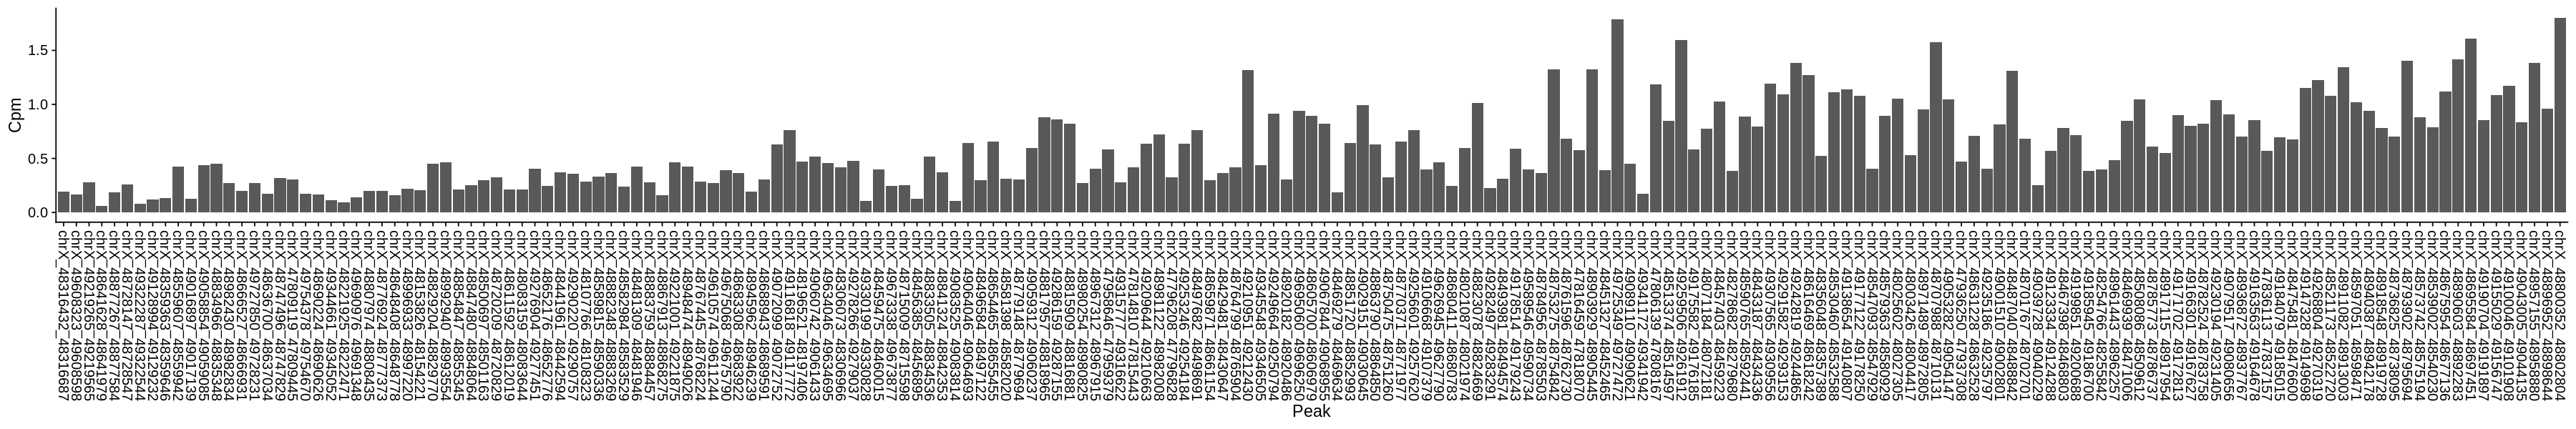

In [86]:
dat = dat_wstarr_gata1_inp
dat = dat %>% dplyr::filter(Peak %in% peaks)
dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Cpm)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=30) 
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


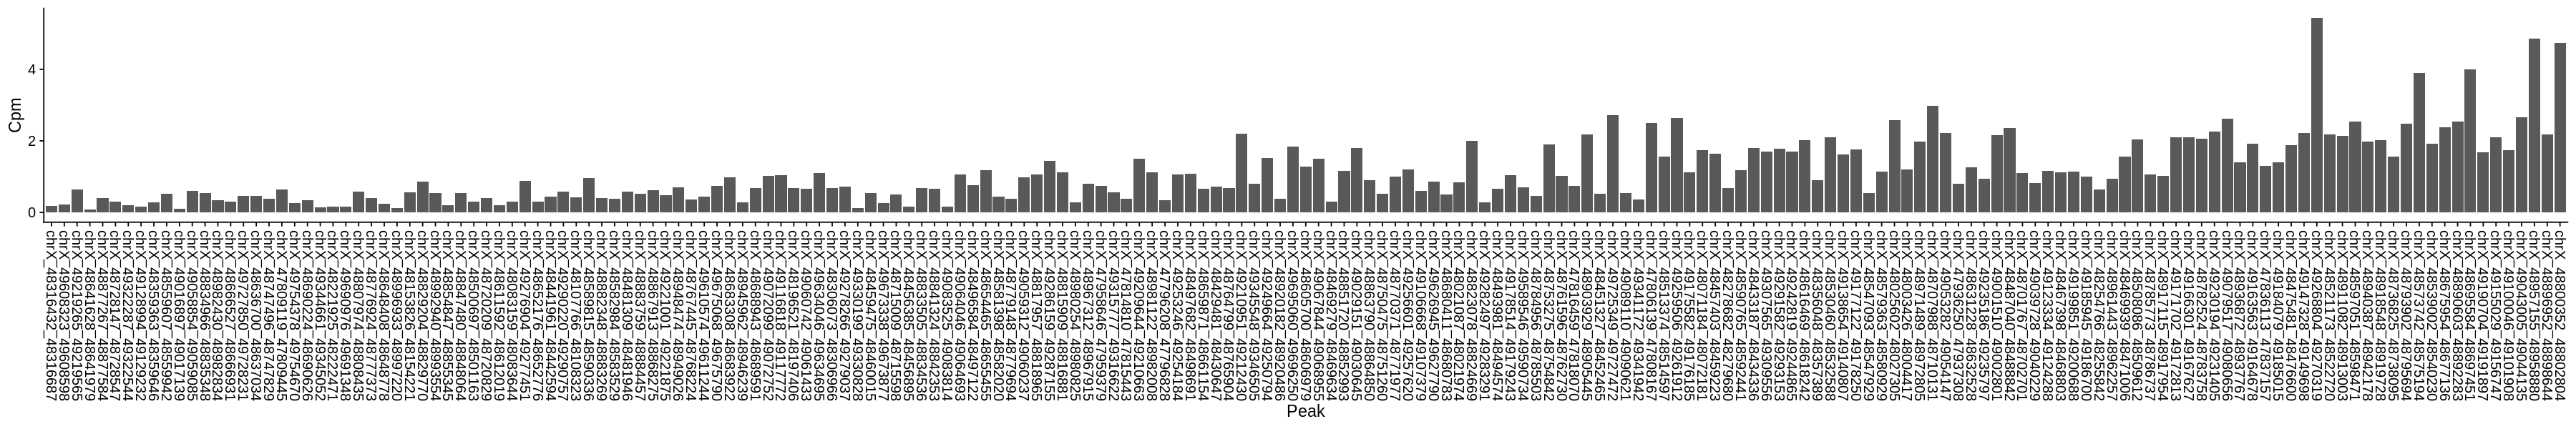

In [87]:
dat = dat_wstarr_gata1_out
dat = dat %>% dplyr::filter(Peak %in% peaks)
dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Cpm)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=30) 
print(gpt)

In [83]:
head(peaks)

[1] "chrX_48800352_48802804" "chrX_48896952_48898644" "chrX_48957155_48958880"
[4] "chrX_49043005_49044135" "chrX_49100046_49101908" "chrX_49155029_49156747"

In [25]:
fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "KS91_K562_ASTARRseq_Input.GATA1.tsv"
fpath = file.path(fdiry, fname)
dat_gata1_inp = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

fdiry = file.path(FD_RES, PREFIX, "coverage_astarrseq_peak_macs_input", "summary")
fname = "KS91_K562_ASTARRseq_Output.GATA1.tsv"
fpath = file.path(fdiry, fname)
dat_gata1_out = read_tsv(fpath) %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

Rows: 197 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Group
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 197 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Group
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
head(dat_gata1_inp)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Input,0.7949314,chrX_47796208_47796828
chrX,47806139,47808167,Input,1.6444201,chrX_47806139_47808167
chrX,47809119,47809445,Input,0.2519672,chrX_47809119_47809445
chrX,47814810,47815443,Input,0.7579963,chrX_47814810_47815443
chrX,47816459,47818070,Input,1.5055737,chrX_47816459_47818070
chrX,47836113,47837157,Input,6.9206893,chrX_47836113_47837157


In [27]:
head(dat_gata1_out)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Output,9.904800,chrX_47796208_47796828
chrX,47806139,47808167,Output,14.429452,chrX_47806139_47808167
chrX,47809119,47809445,Output,1.813228,chrX_47809119_47809445
chrX,47814810,47815443,Output,3.931249,chrX_47814810_47815443
chrX,47816459,47818070,Output,12.849629,chrX_47816459_47818070
chrX,47836113,47837157,Output,133.943991,chrX_47836113_47837157


In [29]:
dat = dat_gata1_inp %>% arrange(Peak)
peak = dat$Peak
print(head(dat))
print(head(peak))

# A tibble: 6 × 6
  Chrom    Start      End Group   Cpm Peak                  
  <chr>    <dbl>    <dbl> <chr> <dbl> <chr>                 
1 chrX  47796208 47796828 Input 0.795 chrX_47796208_47796828
2 chrX  47806139 47808167 Input 1.64  chrX_47806139_47808167
3 chrX  47809119 47809445 Input 0.252 chrX_47809119_47809445
4 chrX  47814810 47815443 Input 0.758 chrX_47814810_47815443
5 chrX  47816459 47818070 Input 1.51  chrX_47816459_47818070
6 chrX  47836113 47837157 Input 6.92  chrX_47836113_47837157
[1] "chrX_47796208_47796828" "chrX_47806139_47808167" "chrX_47809119_47809445"
[4] "chrX_47814810_47815443" "chrX_47816459_47818070" "chrX_47836113_47837157"


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


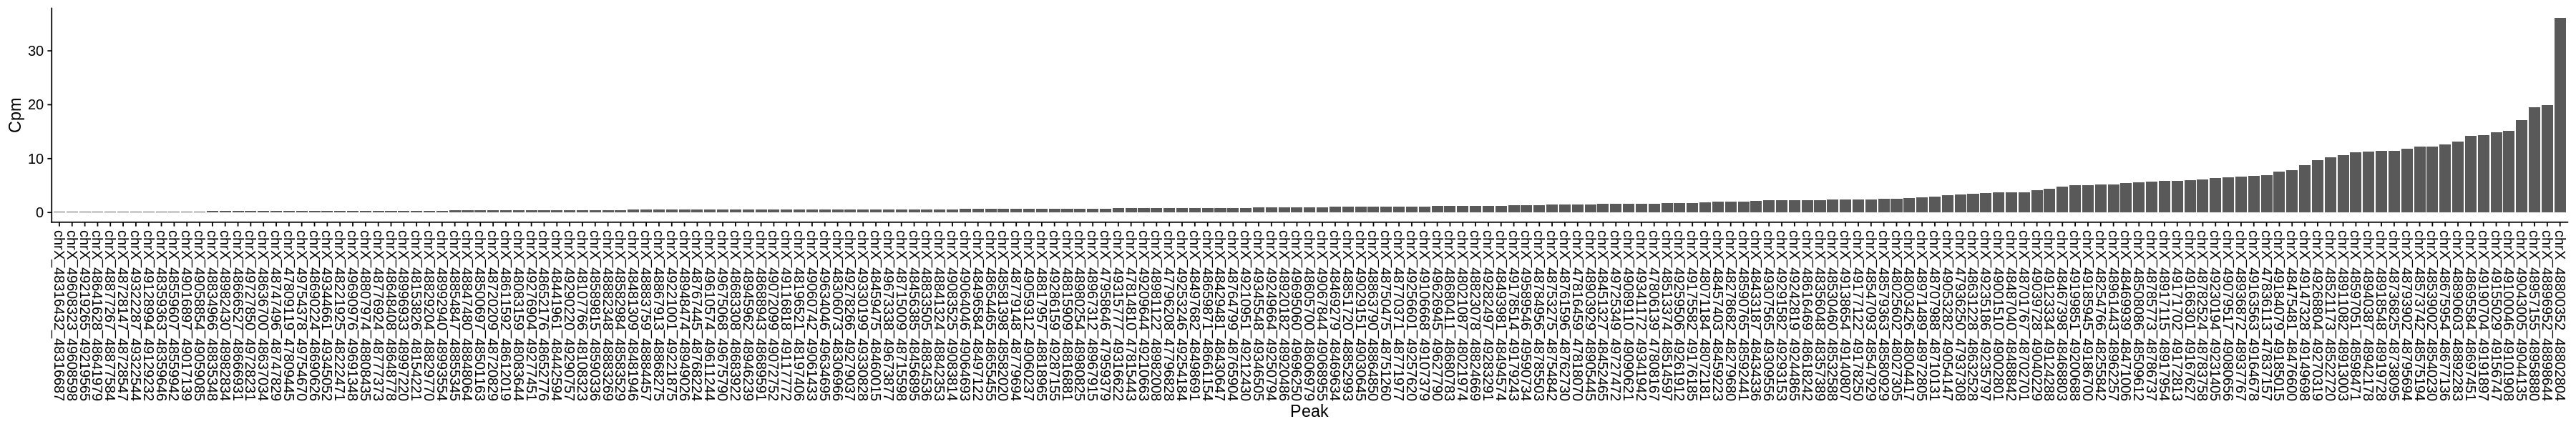

In [32]:
dat = dat_gata1_inp %>% arrange(-Cpm)
peaks = dat$Peak

dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Cpm)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=30) 
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


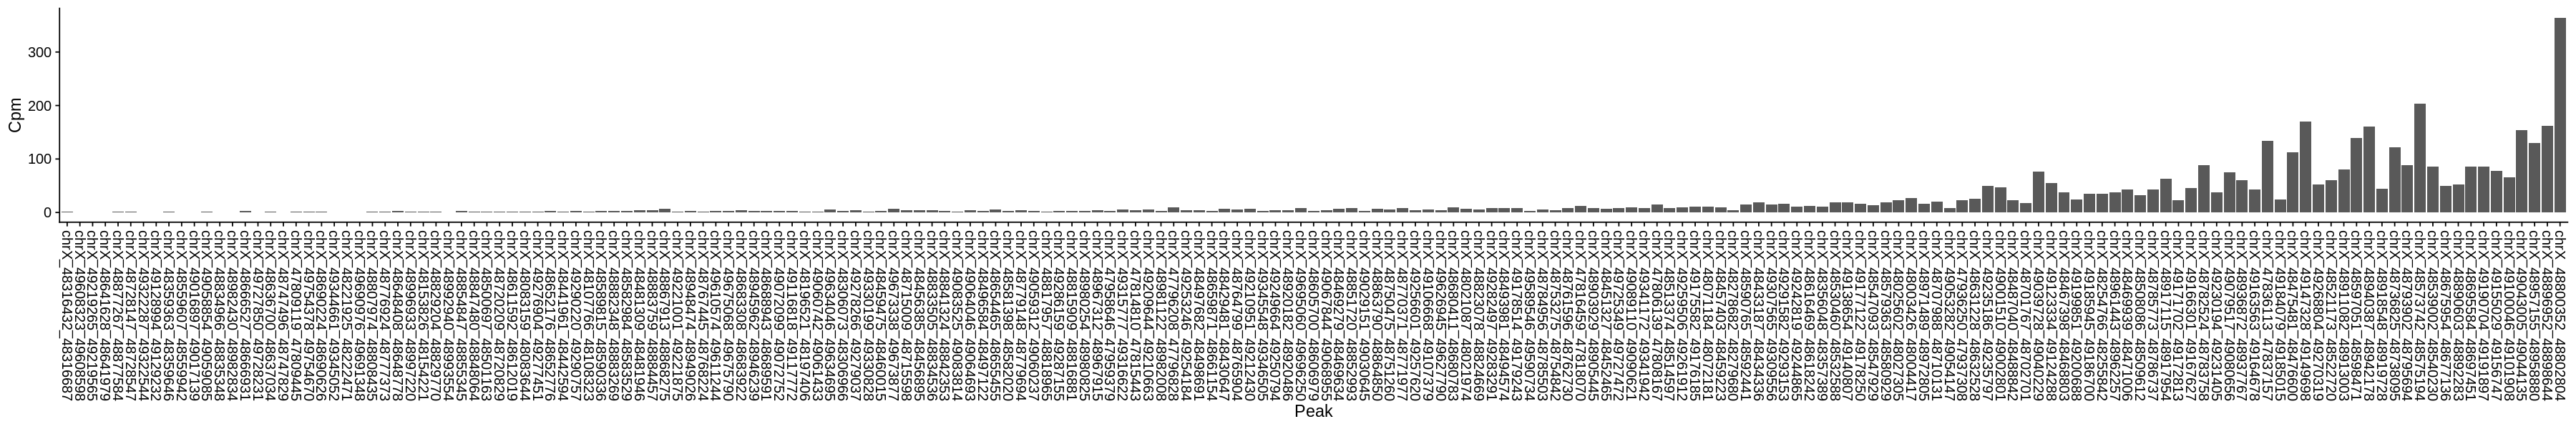

In [33]:
dat = dat_gata1_out
dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Cpm)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=30) 
print(gpt)

In [35]:
###
dat = dat_ccre  
dat = dat %>% 
    dplyr::filter(Peak %in% peaks) %>% 
    dplyr::rename(Label = Label1) 

###
dat = dat %>% 
    group_by(Peak, Label) %>% 
    summarize(Count = n(), .groups="drop")

dat_sub_ccre = dat
print(dim(dat))
head(dat)

[1] 138   3


Peak,Label,Count
<chr>,<chr>,<int>
chrX_47806139_47808167,Low-DNase,3
chrX_47814810_47815443,"CTCF-only,CTCF-bound",1
chrX_47836113_47837157,pELS,1
chrX_47836113_47837157,PLS,1
chrX_47936250_47937308,DNase-only,2
chrX_47936250_47937308,Low-DNase,1


In [36]:
###
dat = dat_remap
dat = dat %>% dplyr::filter(Peak %in% peaks)

###
tmp = dat$Name
tmp = str_split(tmp, ":")
tmp = lapply(tmp, function(x){x[1]})
tmp = unlist(tmp)
dat$Label = tmp

###
dat = dat %>% 
    group_by(Peak, Label) %>% 
    summarize(Count = n(), .groups = "drop")

###
dat_sub_remap = dat
print(dim(dat))
head(dat)

[1] 8529    3


Peak,Label,Count
<chr>,<chr>,<int>
chrX_47796208_47796828,ATF7,1
chrX_47796208_47796828,BRD2,1
chrX_47796208_47796828,BRD3,1
chrX_47796208_47796828,BRD4,1
chrX_47796208_47796828,CCNT2,1
chrX_47796208_47796828,CEBPB,1


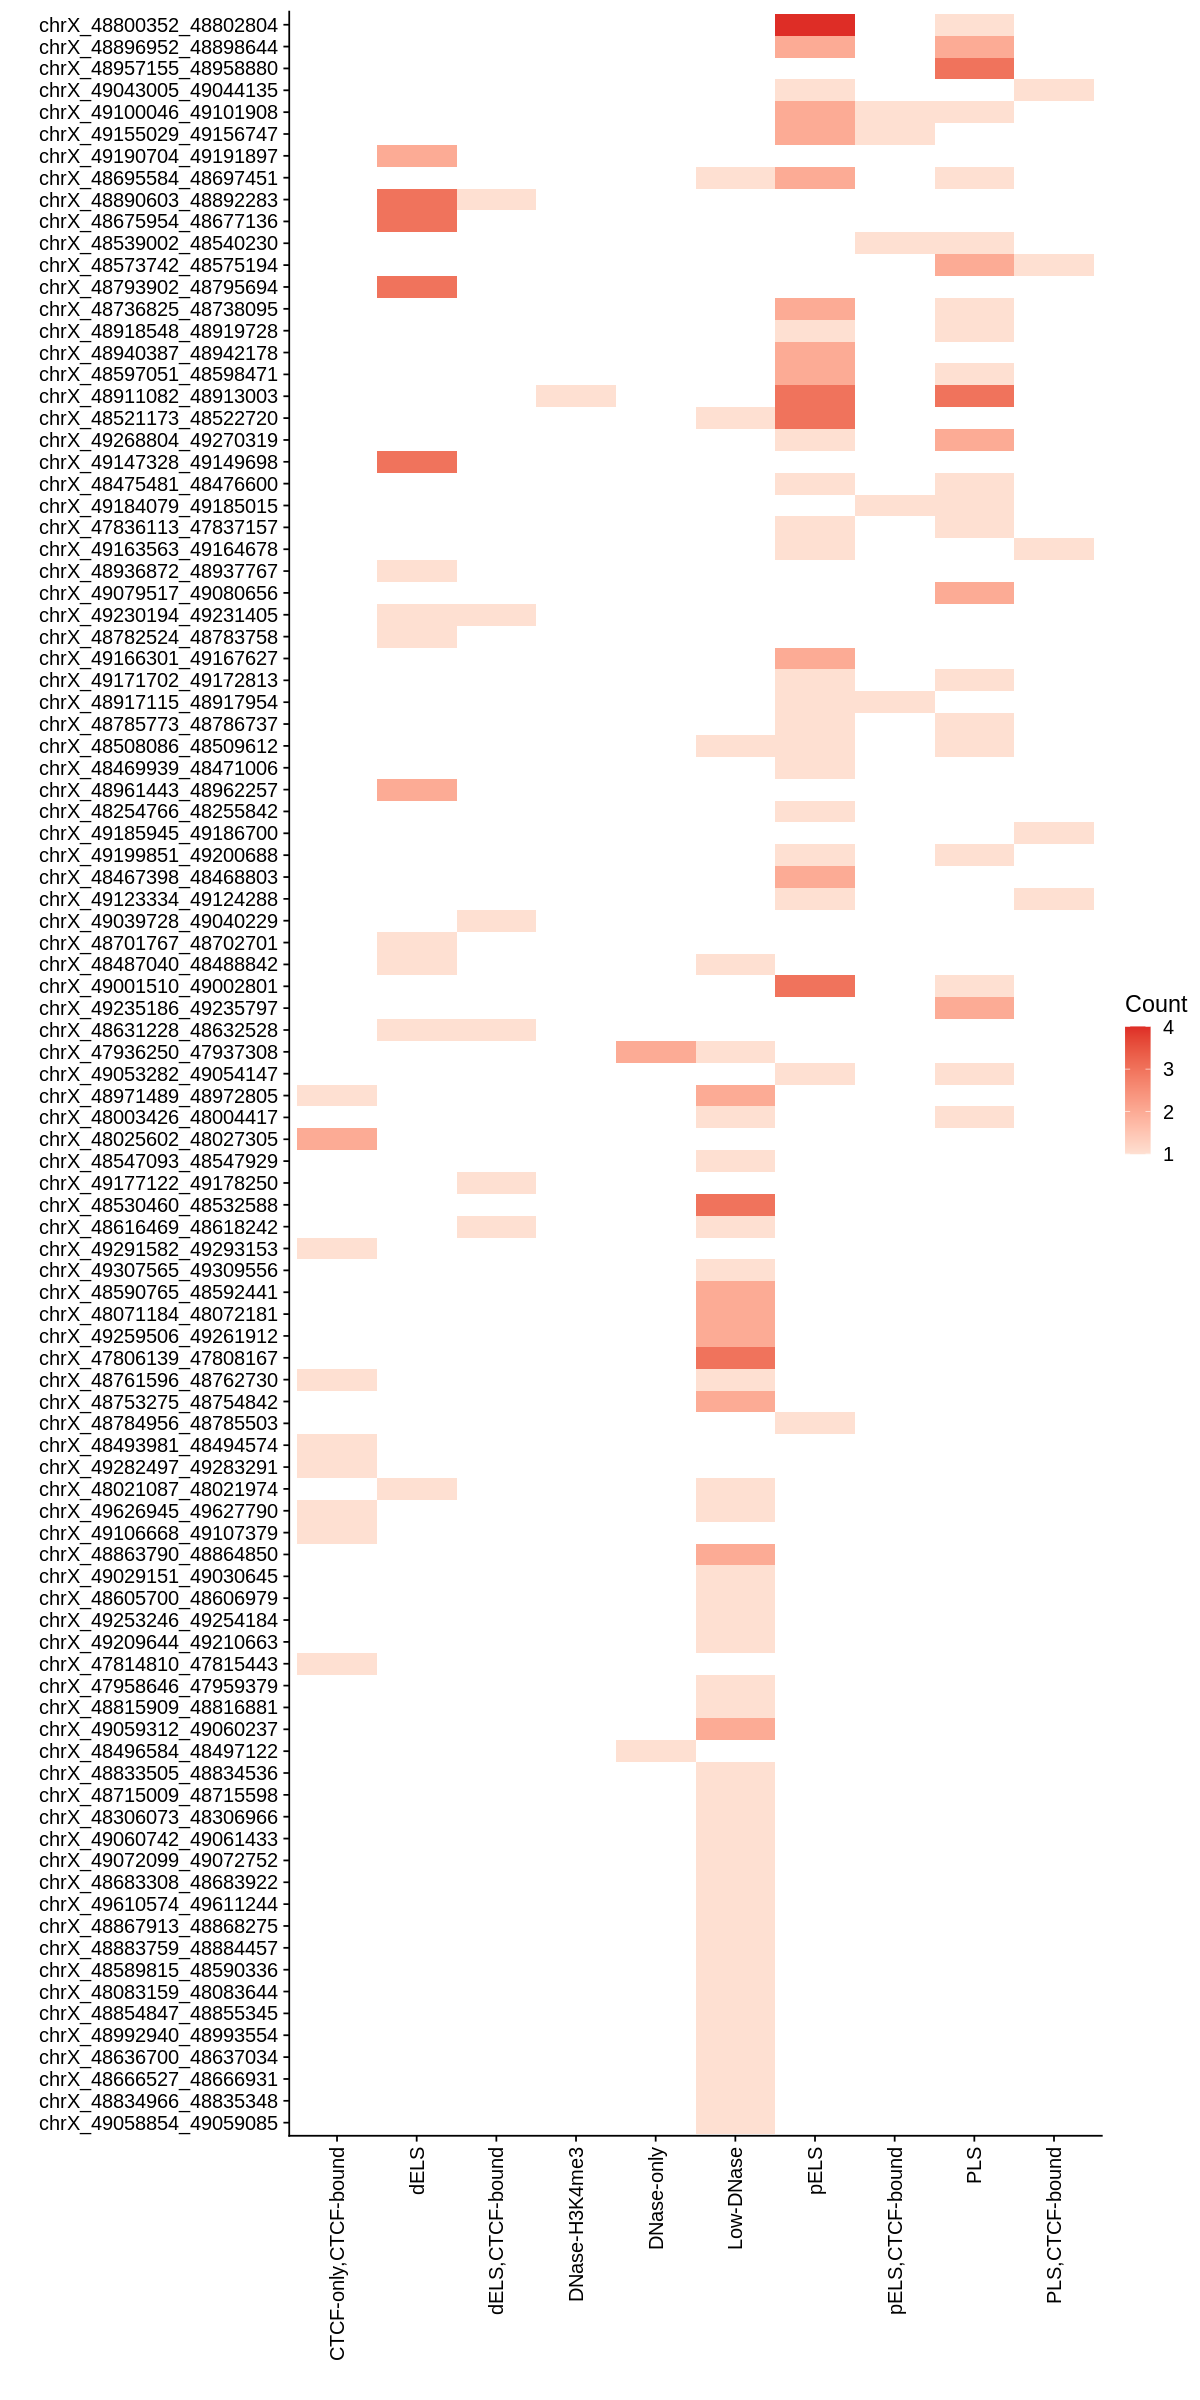

In [37]:
dat = dat_sub_ccre
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Count)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "#fee0d2", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [40]:
dat = dat_sub_ccre
dat = dat %>% spread(Label, Count) %>% replace(is.na(.), 0)
head(dat)

Peak,"CTCF-only,CTCF-bound",dELS,"dELS,CTCF-bound",DNase-H3K4me3,DNase-only,Low-DNase,pELS,"pELS,CTCF-bound",PLS,"PLS,CTCF-bound"
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chrX_47806139_47808167,0,0,0,0,0,3,0,0,0,0
chrX_47814810_47815443,1,0,0,0,0,0,0,0,0,0
chrX_47836113_47837157,0,0,0,0,0,0,1,0,1,0
chrX_47936250_47937308,0,0,0,0,2,1,0,0,0,0
chrX_47958646_47959379,0,0,0,0,0,1,0,0,0,0
chrX_48003426_48004417,0,0,0,0,0,1,0,0,1,0


In [66]:
dat = dat_sub_ccre
dat = dat %>% spread(Label, Count) %>% replace(is.na(.), 0)

mat = dat %>% dplyr::select(-Peak) %>% as.matrix
rownames(mat) = dat$Peak

mat = apply(mat, 1, function(x){x / sum(x)}) %>% t
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Peak")
dat_pre_ccre = dat

head(dat)

,Peak,"CTCF-only,CTCF-bound",dELS,"dELS,CTCF-bound",DNase-H3K4me3,DNase-only,Low-DNase,pELS,"pELS,CTCF-bound",PLS,"PLS,CTCF-bound"
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chrX_47806139_47808167,0,0,0,0,0.0000000,1.0000000,0.0,0,0.0,0
2,chrX_47814810_47815443,1,0,0,0,0.0000000,0.0000000,0.0,0,0.0,0
3,chrX_47836113_47837157,0,0,0,0,0.0000000,0.0000000,0.5,0,0.5,0
4,chrX_47936250_47937308,0,0,0,0,0.6666667,0.3333333,0.0,0,0.0,0
5,chrX_47958646_47959379,0,0,0,0,0.0000000,1.0000000,0.0,0,0.0,0
6,chrX_48003426_48004417,0,0,0,0,0.0000000,0.5000000,0.0,0,0.5,0


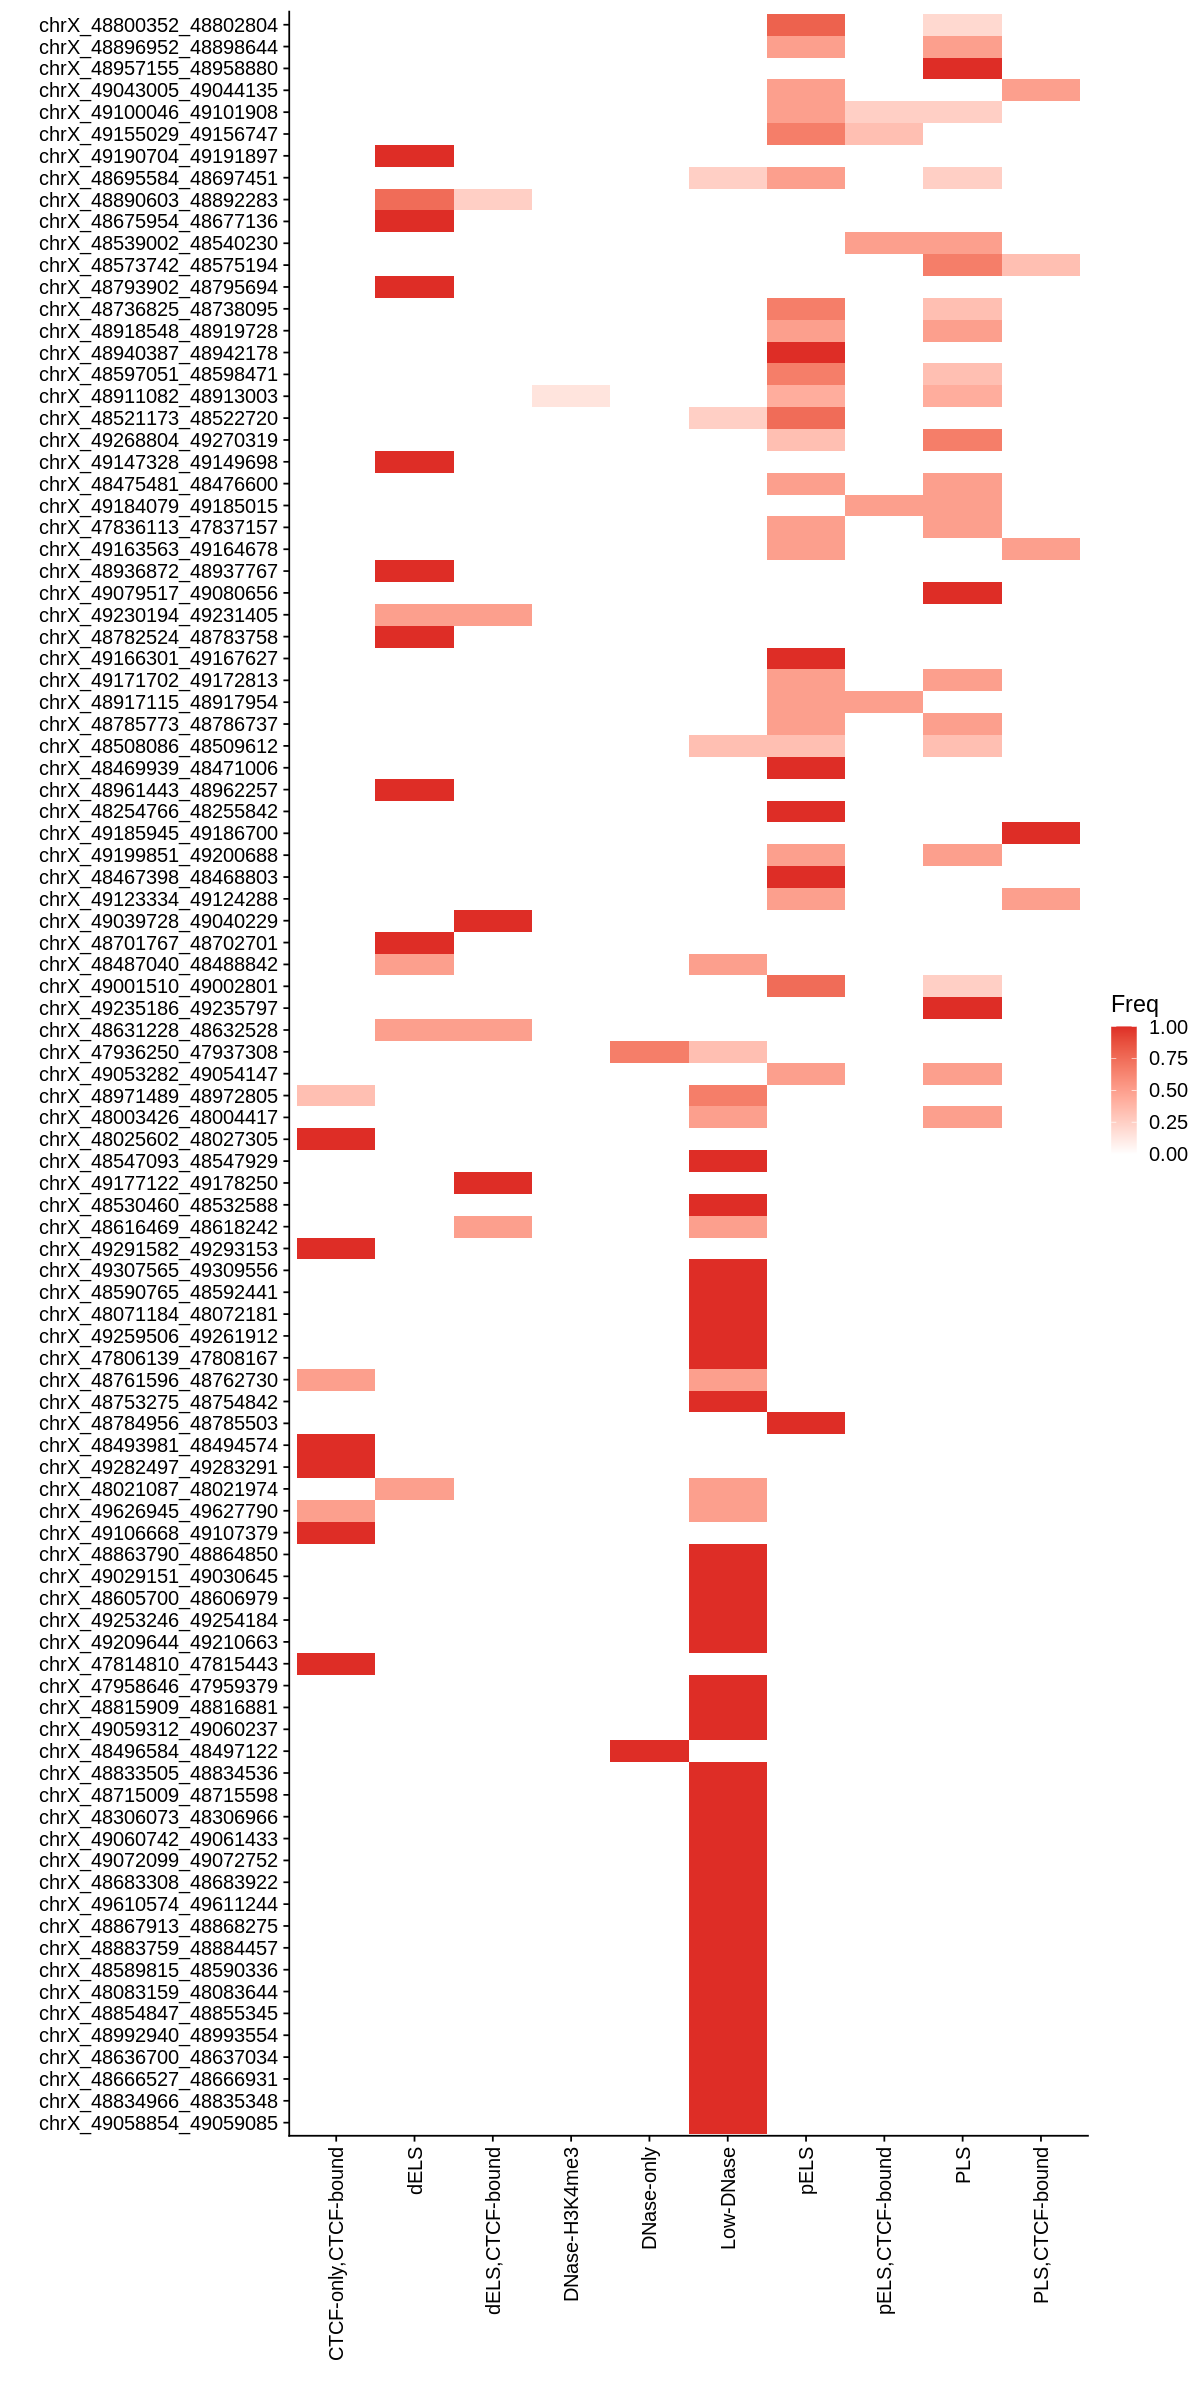

In [67]:
dat = dat_pre_ccre
dat = dat %>% gather(Label, Freq, -Peak)
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "white", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [68]:
head(dat_gata1_inp)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Input,0.7949314,chrX_47796208_47796828
chrX,47806139,47808167,Input,1.6444201,chrX_47806139_47808167
chrX,47809119,47809445,Input,0.2519672,chrX_47809119_47809445
chrX,47814810,47815443,Input,0.7579963,chrX_47814810_47815443
chrX,47816459,47818070,Input,1.5055737,chrX_47816459_47818070
chrX,47836113,47837157,Input,6.9206893,chrX_47836113_47837157


In [69]:
head(dat_gata1_out)

Chrom,Start,End,Group,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,47796208,47796828,Output,9.904800,chrX_47796208_47796828
chrX,47806139,47808167,Output,14.429452,chrX_47806139_47808167
chrX,47809119,47809445,Output,1.813228,chrX_47809119_47809445
chrX,47814810,47815443,Output,3.931249,chrX_47814810_47815443
chrX,47816459,47818070,Output,12.849629,chrX_47816459_47818070
chrX,47836113,47837157,Output,133.943991,chrX_47836113_47837157


In [70]:
dat1 = dat_gata1_inp %>% mutate(Input = Cpm) %>% dplyr::select(Peak, Input)
dat2 = dat_gata1_out %>% mutate(Output = Cpm) %>% dplyr::select(Peak, Output)
dat  = inner_join(dat1, dat2, by="Peak")
dat  = inner_join(dat, dat_pre_ccre, by="Peak")
head(dat)

Peak,Input,Output,"CTCF-only,CTCF-bound",dELS,"dELS,CTCF-bound",DNase-H3K4me3,DNase-only,Low-DNase,pELS,"pELS,CTCF-bound",PLS,"PLS,CTCF-bound"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47806139_47808167,1.6444201,14.429452,0,0,0,0,0.0000000,1.0000000,0.0,0,0.0,0
chrX_47814810_47815443,0.7579963,3.931249,1,0,0,0,0.0000000,0.0000000,0.0,0,0.0,0
chrX_47836113_47837157,6.9206893,133.943991,0,0,0,0,0.0000000,0.0000000,0.5,0,0.5,0
chrX_47936250_47937308,3.3391407,23.174277,0,0,0,0,0.6666667,0.3333333,0.0,0,0.0,0
chrX_47958646_47959379,0.7432925,3.307810,0,0,0,0,0.0000000,1.0000000,0.0,0,0.0,0
chrX_48003426_48004417,2.6349770,27.351127,0,0,0,0,0.0000000,0.5000000,0.0,0,0.5,0


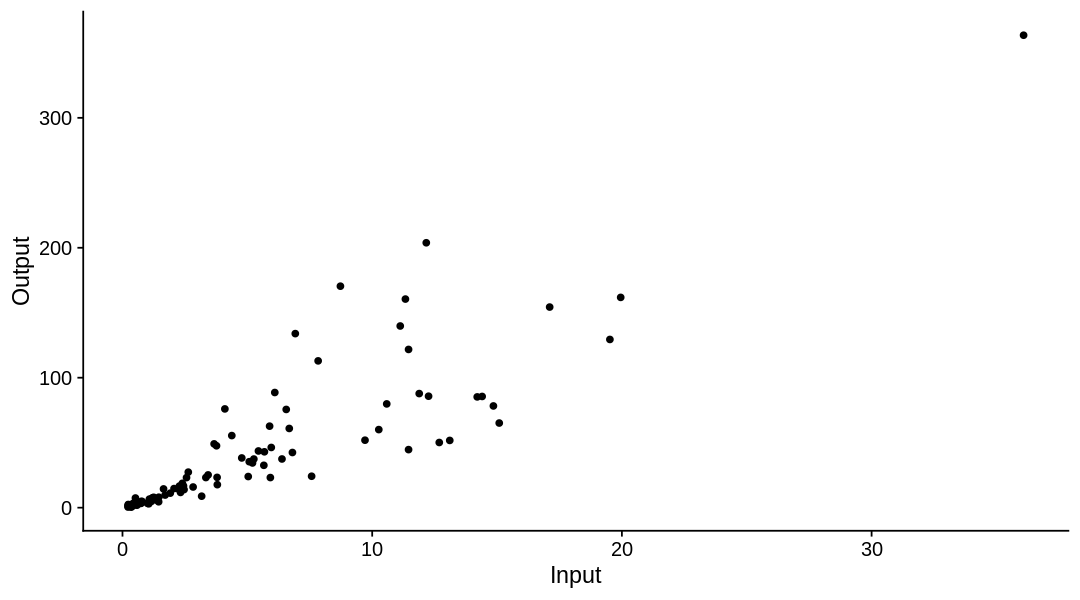

In [76]:
gpt = ggplot(dat, aes(x=Input, y=Output)) + geom_point() + 
   # scale_color_gradient(low = "white", high = "#de2d26") + 
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=9)
print(gpt)

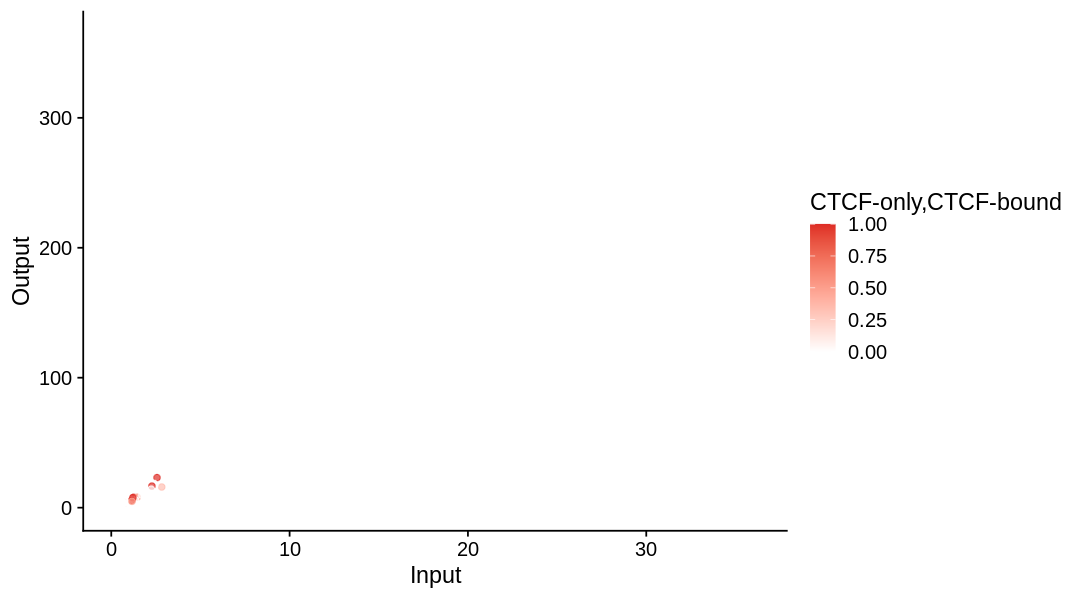

In [78]:
gpt = ggplot(dat, aes(x=Input, y=Output, color = `CTCF-only,CTCF-bound`)) + 
    geom_point(alpha=0.7) + 
    scale_color_gradient(low = "white", high = "#de2d26") + 
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=9)
print(gpt)

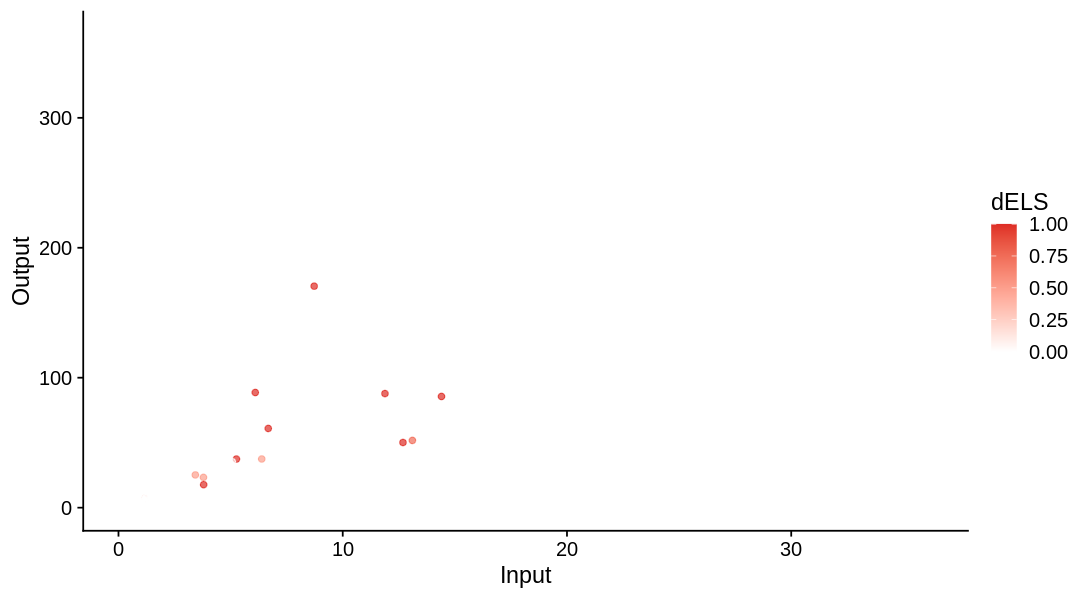

In [79]:
gpt = ggplot(dat, aes(x=Input, y=Output, color = dELS)) + 
    geom_point(alpha=0.7) + 
    scale_color_gradient(low = "white", high = "#de2d26") + 
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=9)
print(gpt)